In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as Mean_ab_e

In [2]:
data=pd.read_csv("crude-oil-price.csv")

In [3]:
data.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


In [4]:
data.tail(10)

,date,price,percentChange,change
474,2022-09-01T00:00:00,78.7200,-11.580,-10.3100
475,2022-10-03T00:00:00,85.4000,8.486,6.6800
476,2022-11-01T00:00:00,80.6600,-5.550,-4.7400
477,2022-12-01T00:00:00,80.4500,-0.260,-0.2100
478,2023-01-03T00:00:00,79.1700,-1.591,-1.2800
479,2023-02-01T00:00:00,77.1900,-2.501,-1.9800
480,2023-03-01T00:00:00,75.8000,-1.801,-1.3900
481,2023-04-03T00:00:00,76.7800,1.293,0.9800
482,2023-05-01T00:00:00,68.0900,-11.318,-8.6900
483,2023-06-01T00:00:00,67.7637,-0.479,-0.3263


# Exploratory Data Analysis(EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           484 non-null    object 
 1   price          484 non-null    float64
 2   percentChange  483 non-null    float64
 3   change         483 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


In [6]:
data.shape

(484, 4)

In [7]:
data['date']=pd.to_datetime(data['date'], format="%Y-%m")

In [8]:
data.head(2)

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646,1.36


In [9]:
Ndata=data.copy()

In [10]:
Ndata.head(1)

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN


# Missing Values Imputation

In [11]:
Ndata.isnull().sum()

date             0
price            0
percentChange    1
change           1
dtype: int64

In [12]:
mean_cp = Ndata['percentChange'].mean()
print('The mean of percent change is = ',mean_cp)
mean_c = Ndata['change'].mean()
print('The mean of change is = ',mean_c)

The mean of percent change is =  0.718351966873706
The mean of change is =  0.07969710144927532


In [13]:
Ndata['percentChange'] = Ndata['percentChange'].fillna(mean_cp)
Ndata['change'] = Ndata['change'].fillna(mean_c)

In [14]:
Ndata.isnull().sum()

date             0
price            0
percentChange    0
change           0
dtype: int64

<Axes: >

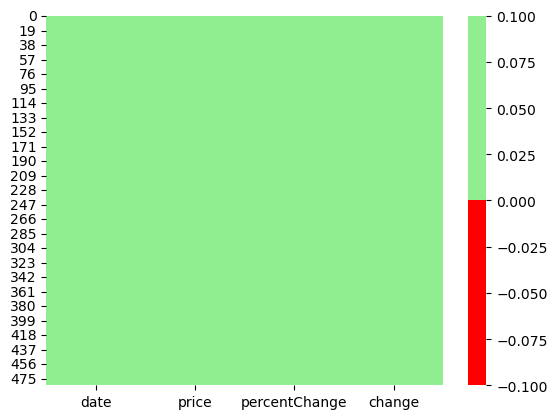

In [15]:
#Heatmap
cols = Ndata.columns
colours = ['red', 'lightgreen']# in this figure red color shows Missing values and lightgreen shows all data
sns.heatmap(Ndata[cols].isnull(), cmap=sns.color_palette(colours))

In [16]:
Ndata.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [17]:
Ndata.nunique()

date             484
price            459
percentChange    483
change           392
dtype: int64

In [18]:
Ndata[Ndata.duplicated()]

,date,price,percentChange,change


# Visualizations

Text(0.5, 1.0, 'Date-Change')

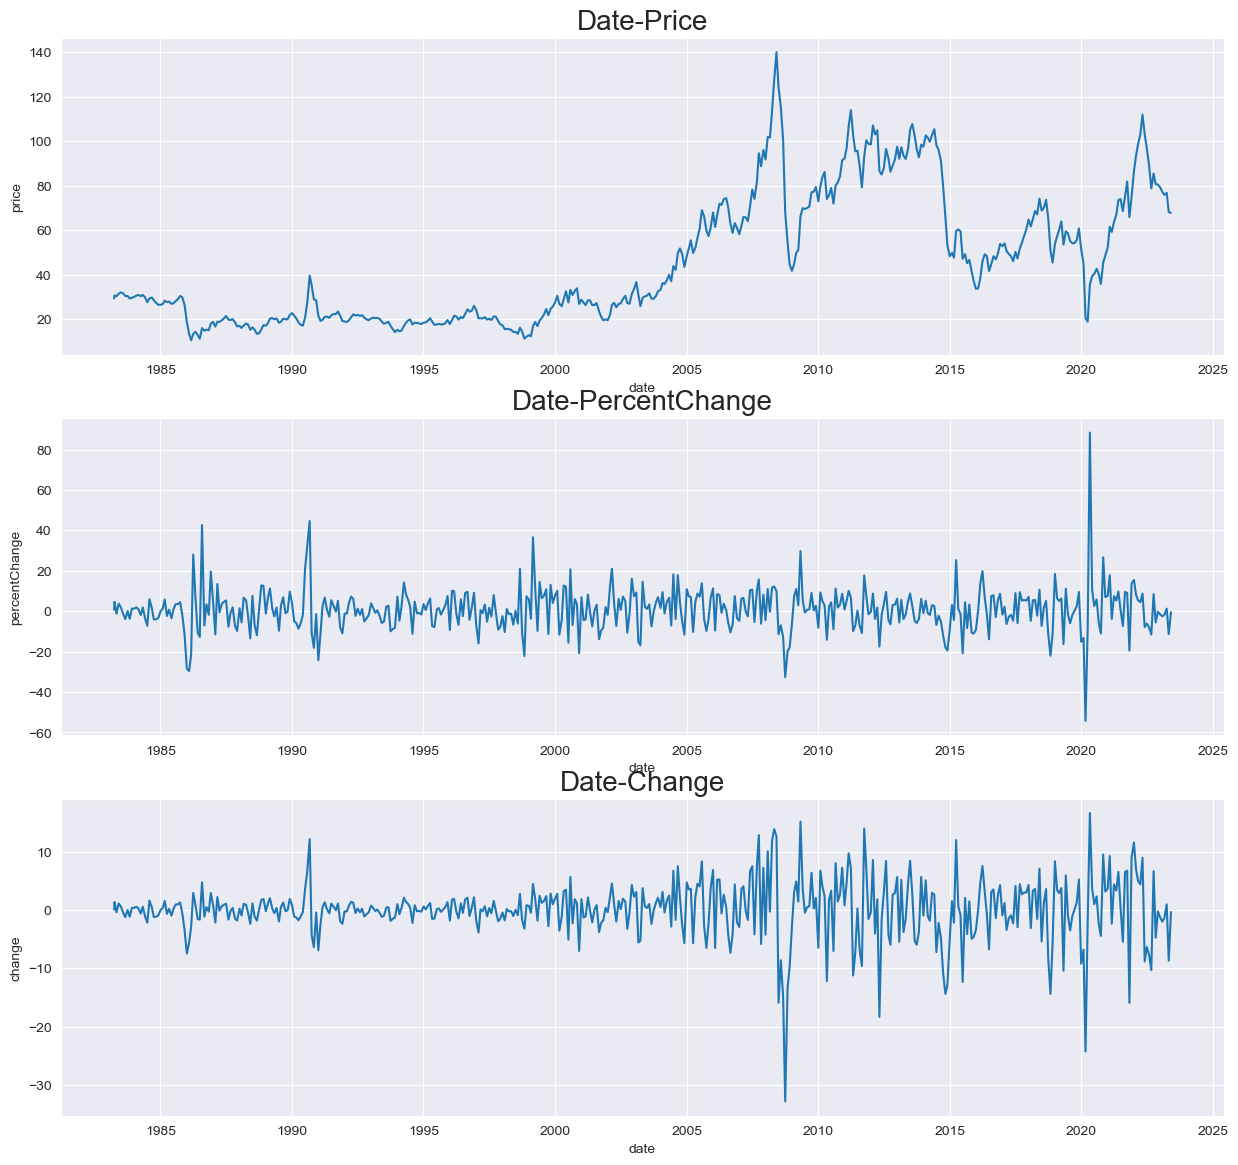

In [19]:
#1.Line plot
#Time vs Price Line Plot
plt.figure(figsize = (15,14))
sns.set_style(style='darkgrid')
plt.subplot(3,1,1)
sns.lineplot(data=Ndata, x = 'date', y = 'price')
plt.title('Date-Price', size=20,)

plt.subplot(3,1,2)
sns.lineplot(data=Ndata, x='date', y='percentChange')
plt.title('Date-PercentChange', size=20)

plt.subplot(3,1,3)
sns.lineplot(data=Ndata, x='date', y='change')
plt.title('Date-Change', size=20)

<Axes: xlabel='change', ylabel='Density'>

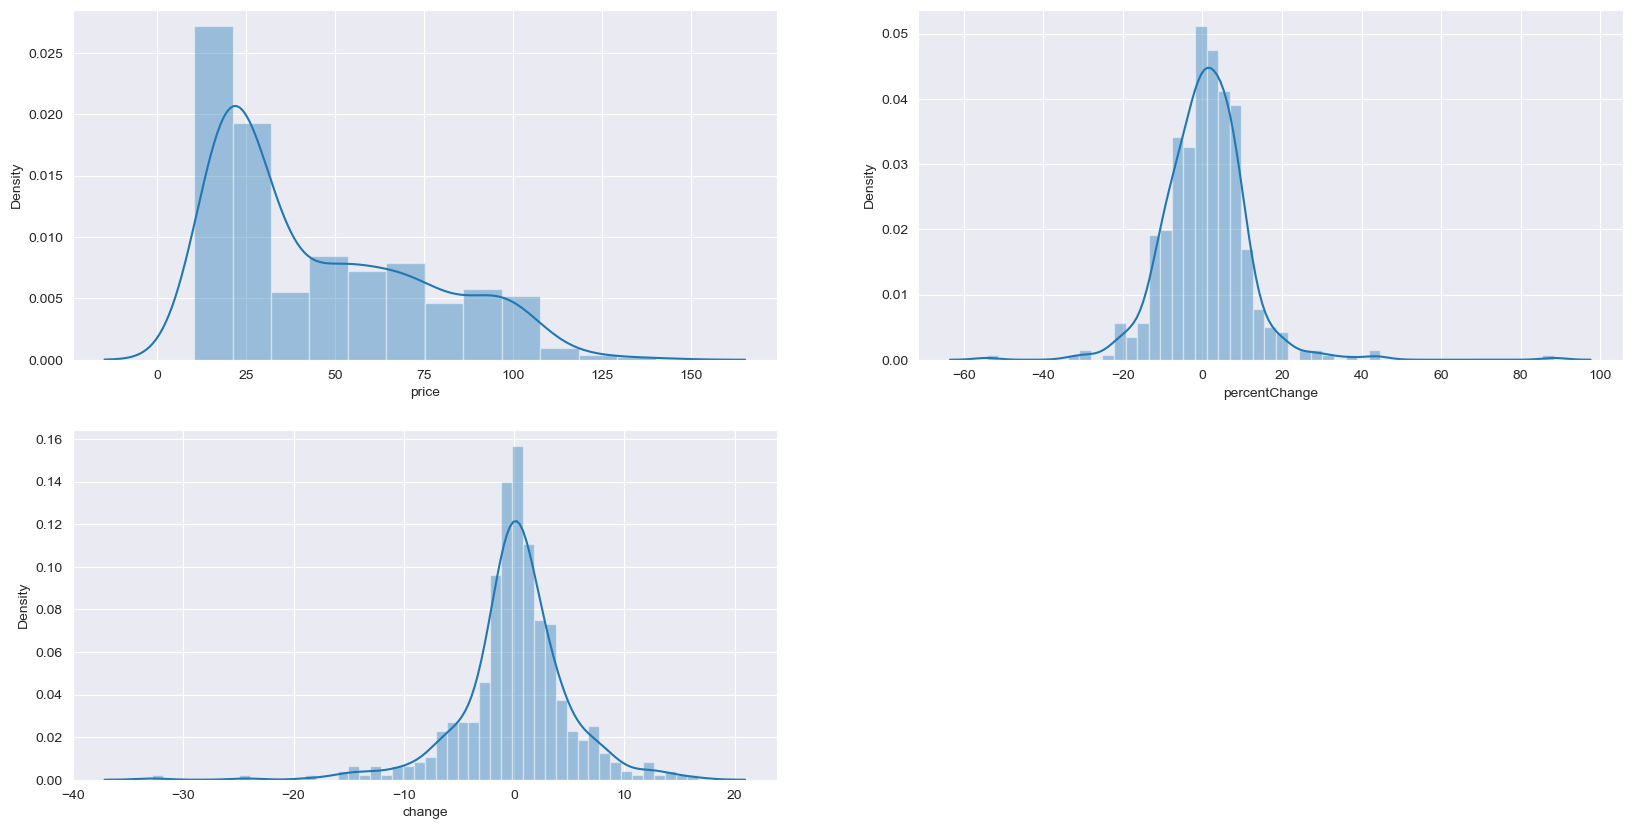

In [20]:
#2.Distplot
plt.figure(figsize=(20,10))
sns.set_style(style='darkgrid')
plt.subplot(2,2,1)
sns.distplot(Ndata['price'])
plt.subplot(2,2,2)
sns.distplot(Ndata['percentChange'])
plt.subplot(2,2,3)
sns.distplot(Ndata['change'])


Text(0.5, 1.0, 'Change')

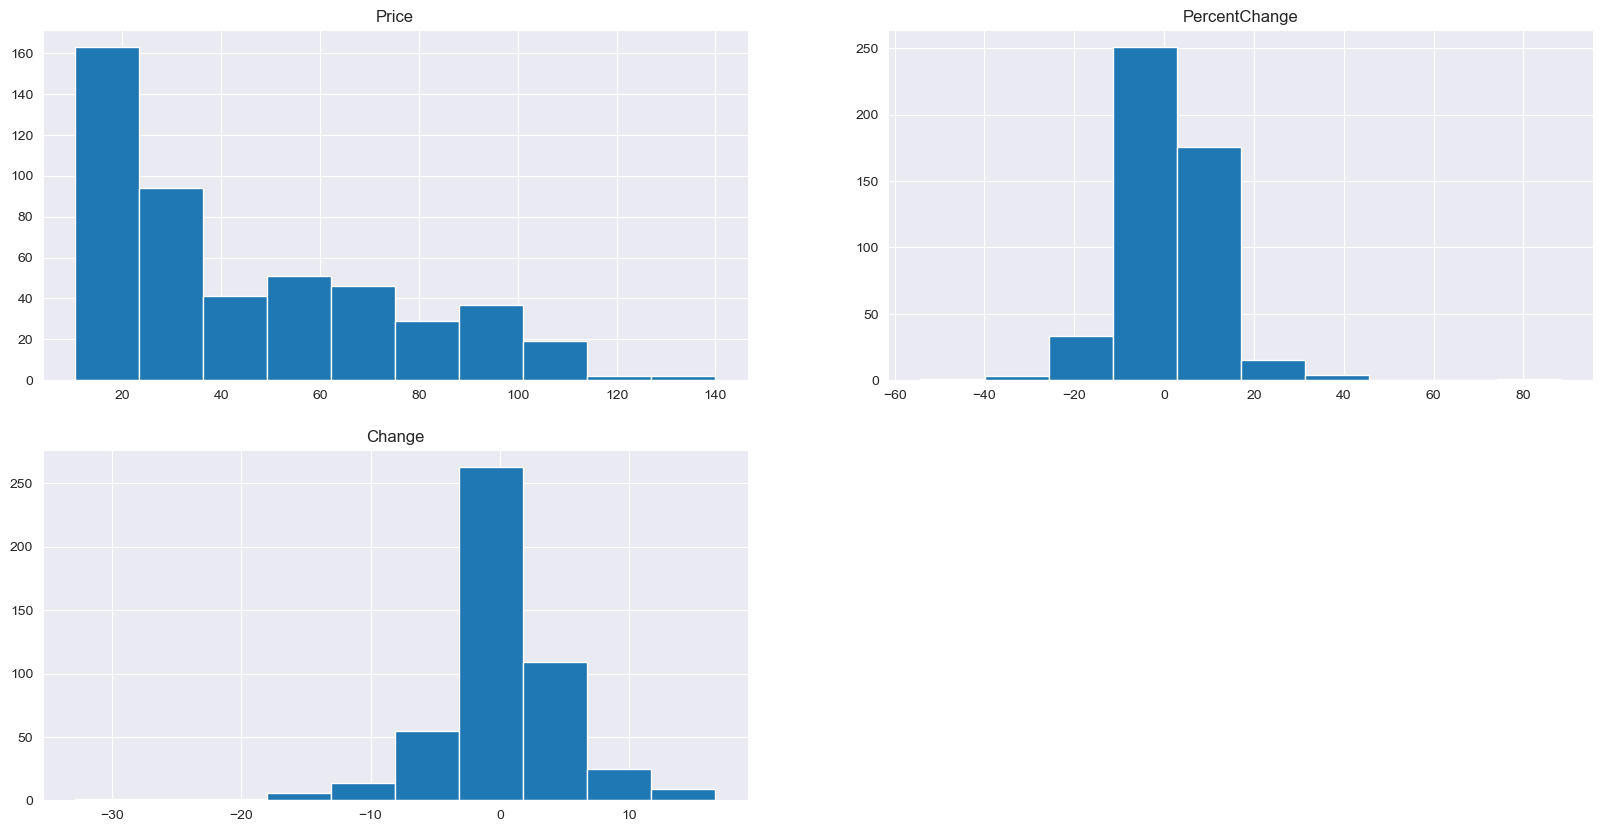

In [21]:
#3.Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
Ndata['price'].hist()
plt.title("Price")
plt.subplot(2,2,2)
Ndata['percentChange'].hist()
plt.title("PercentChange")
plt.subplot(2,2,3)
Ndata['change'].hist()
plt.title("Change")

# Outlier Detection

Text(0.5, 1.0, 'Change')

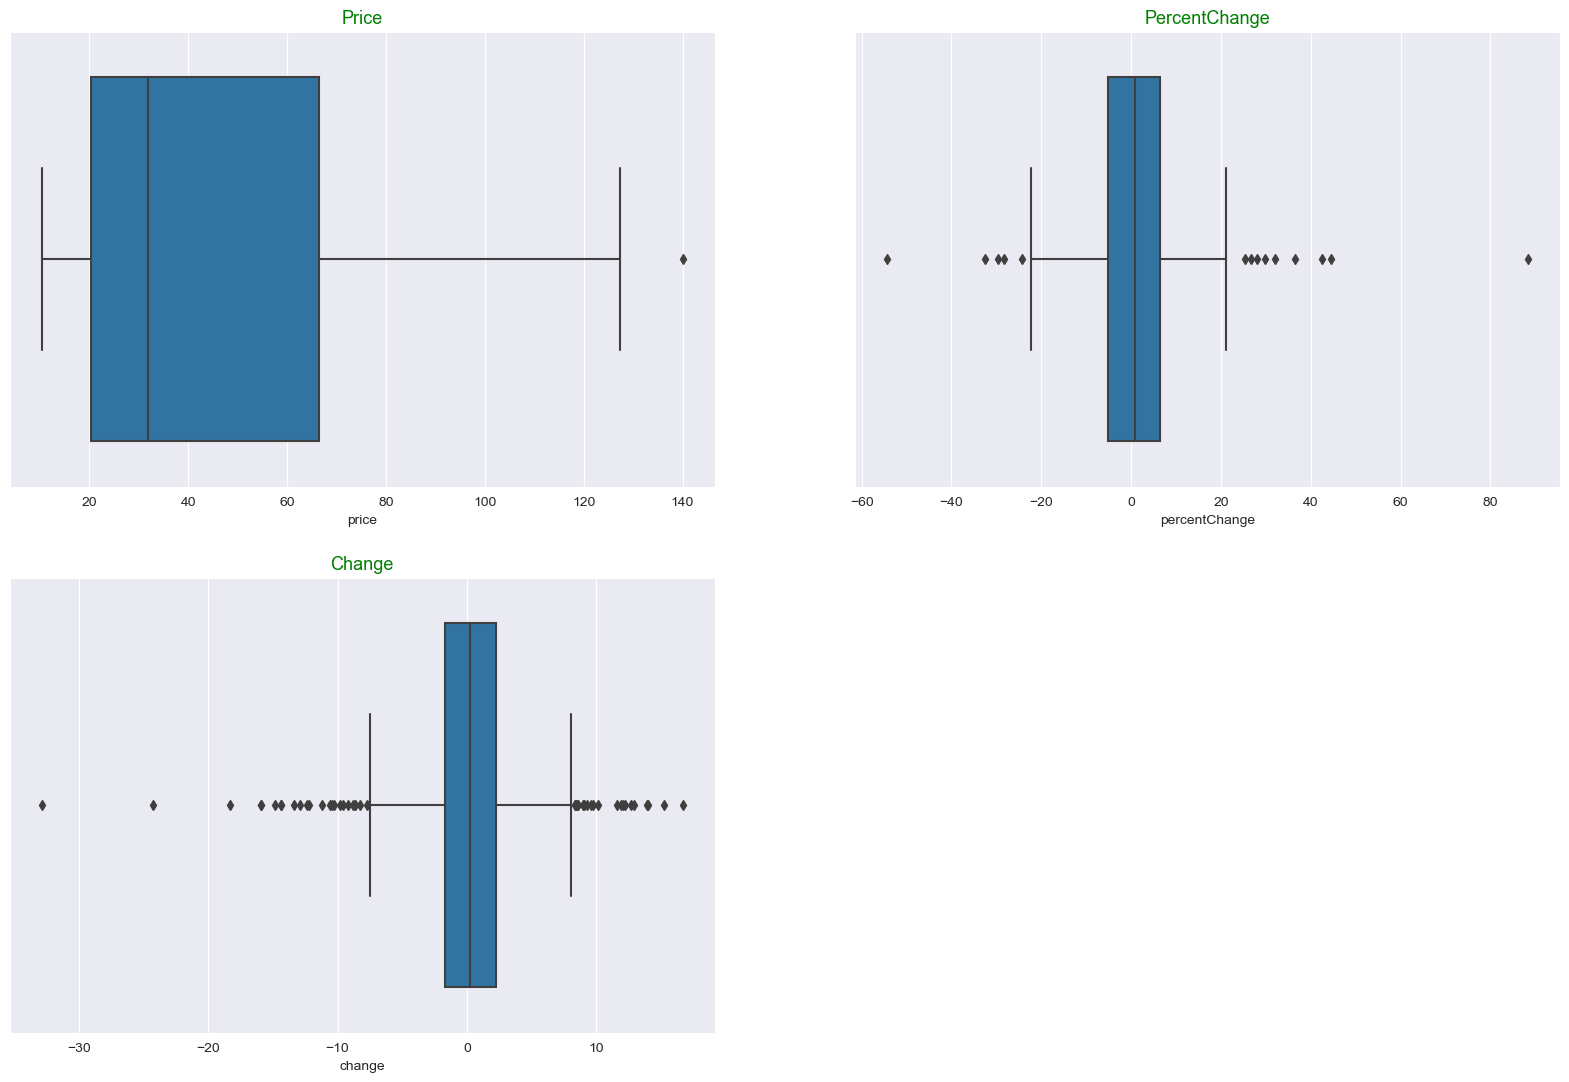

In [22]:
plt.figure(figsize = (20,13))
#Price
plt.subplot(2,2,1)
sns.boxplot(x = 'price', data=Ndata)
plt.title('Price', c='green', size=13)
#PercentChange
plt.subplot(2,2,2)
sns.boxplot(x = 'percentChange', data=Ndata)
plt.title('PercentChange', c='green', size=13)
#Change
plt.subplot(2,2,3)
sns.boxplot(x = 'change', data=Ndata)
plt.title('Change', c='green', size=13)


# Outliers by the Year

In [23]:
Ndata['Year'] = pd.to_datetime(Ndata['date']).dt.strftime("%Y")
Ndata['Year'] = Ndata['Year'].astype(str).astype(int)
Ndata

,date,price,percentChange,change,Year
0,1983-03-30,29.2700,0.718352,0.079697,1983
1,1983-04-04,30.6300,4.646000,1.360000,1983
2,1983-05-02,30.2500,-1.241000,-0.380000,1983
3,1983-06-01,31.3800,3.736000,1.130000,1983
4,1983-07-01,32.0000,1.976000,0.620000,1983
...,...,...,...,...,...
479,2023-02-01,77.1900,-2.501000,-1.980000,2023
480,2023-03-01,75.8000,-1.801000,-1.390000,2023
481,2023-04-03,76.7800,1.293000,0.980000,2023
482,2023-05-01,68.0900,-11.318000,-8.690000,2023


In [24]:
Ndata.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
Year                      int64
dtype: object

In [25]:
Ndata.set_index('date')

,price,percentChange,change,Year
date,,,,
1983-03-30,29.2700,0.718352,0.079697,1983
1983-04-04,30.6300,4.646000,1.360000,1983
1983-05-02,30.2500,-1.241000,-0.380000,1983
1983-06-01,31.3800,3.736000,1.130000,1983
1983-07-01,32.0000,1.976000,0.620000,1983
...,...,...,...,...
2023-02-01,77.1900,-2.501000,-1.980000,2023
2023-03-01,75.8000,-1.801000,-1.390000,2023
2023-04-03,76.7800,1.293000,0.980000,2023


<Axes: xlabel='Year', ylabel='change'>

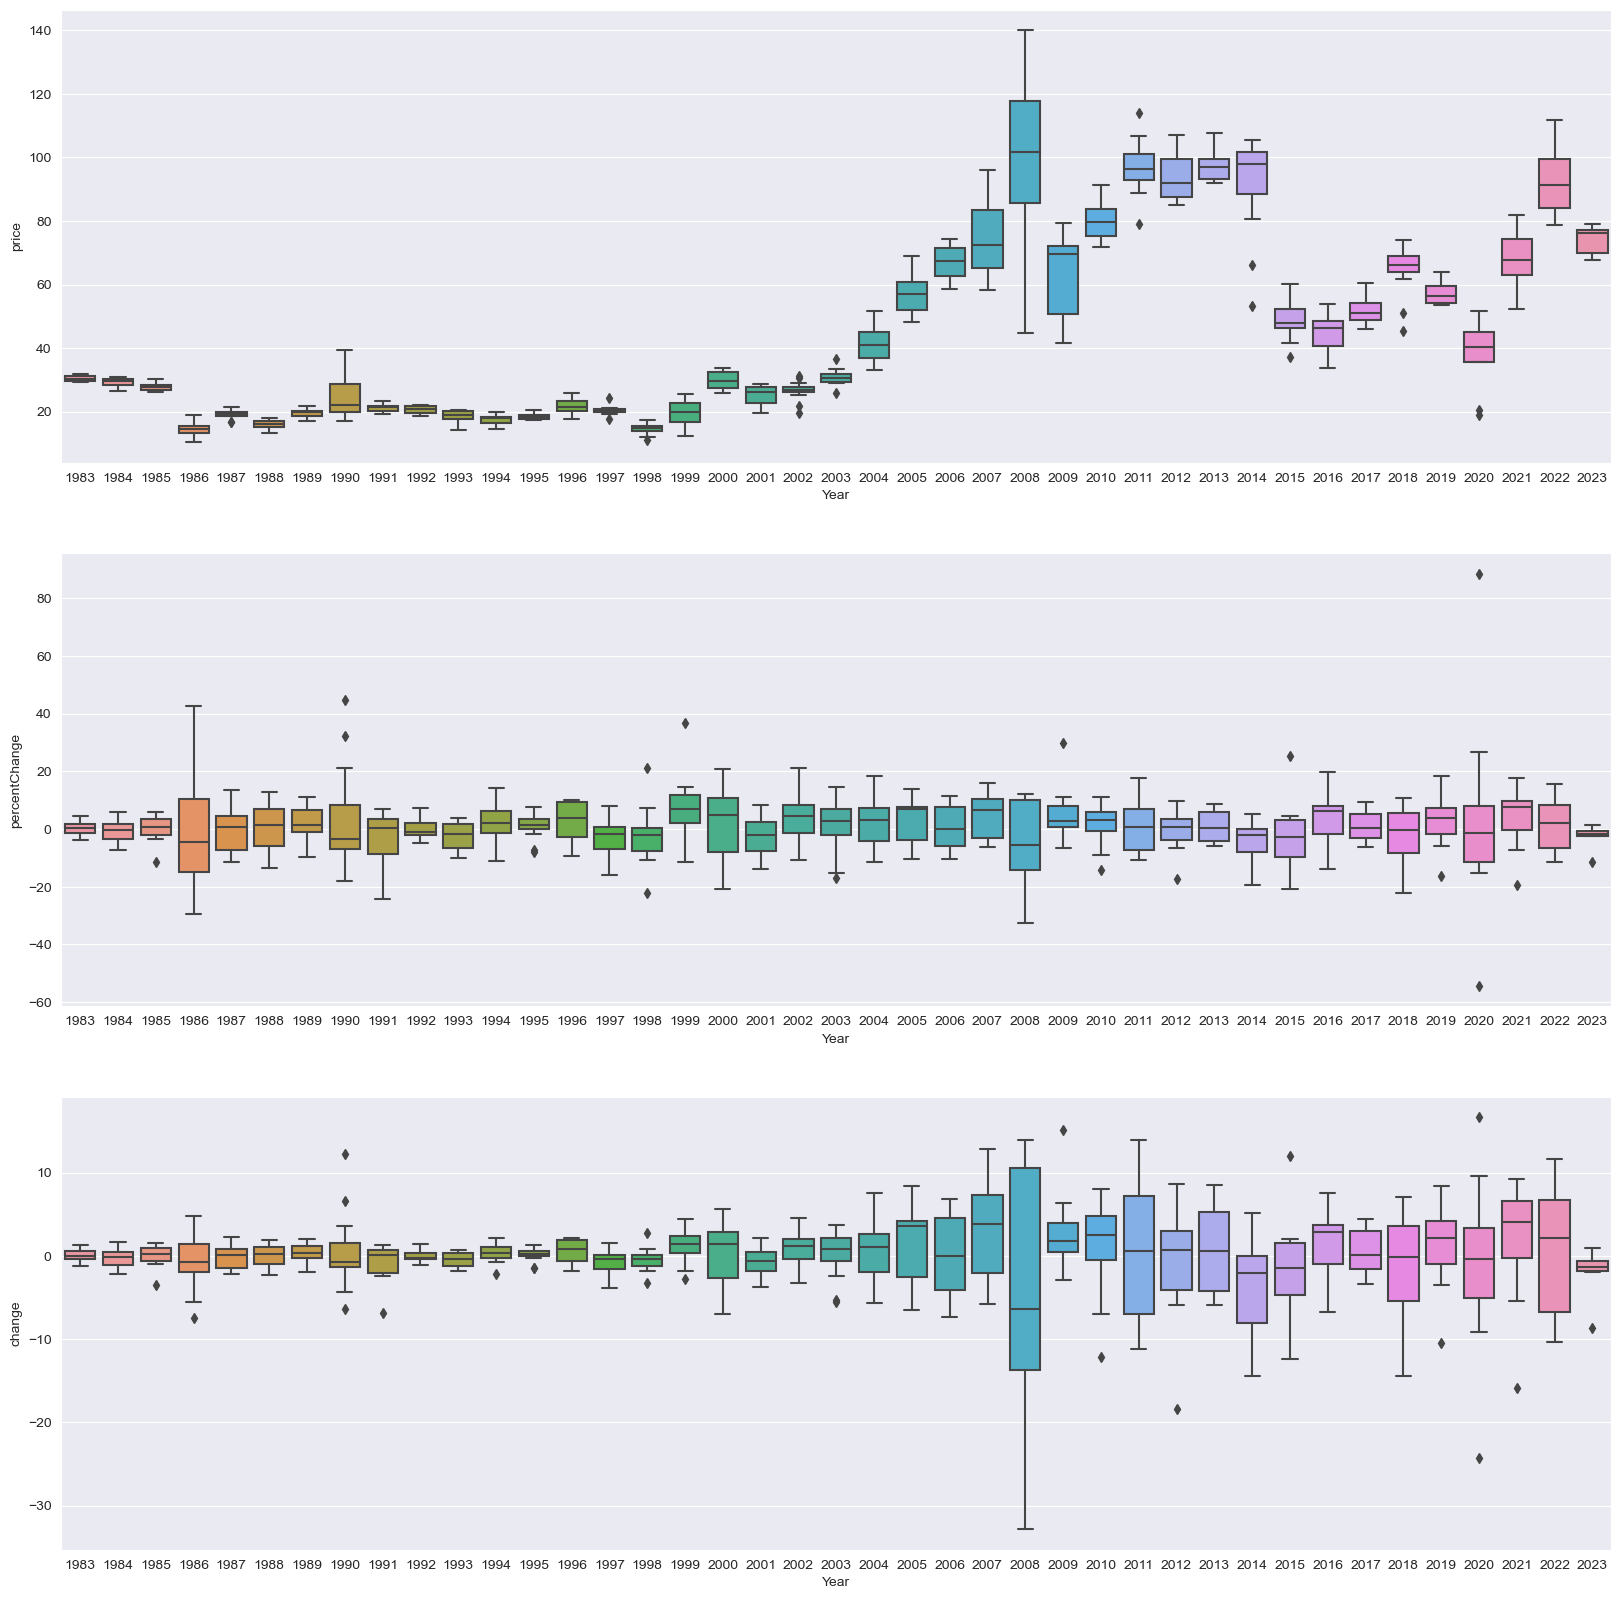

In [26]:
plt.figure(figsize = (20,20))
plt.subplot(311)
sns.boxplot(x='Year', y='price', data=Ndata)
plt.subplot(312)
sns.boxplot(x='Year', y='percentChange', data=Ndata)
plt.subplot(313)
sns.boxplot(x='Year', y='change', data=Ndata)

# Treating The Outliers

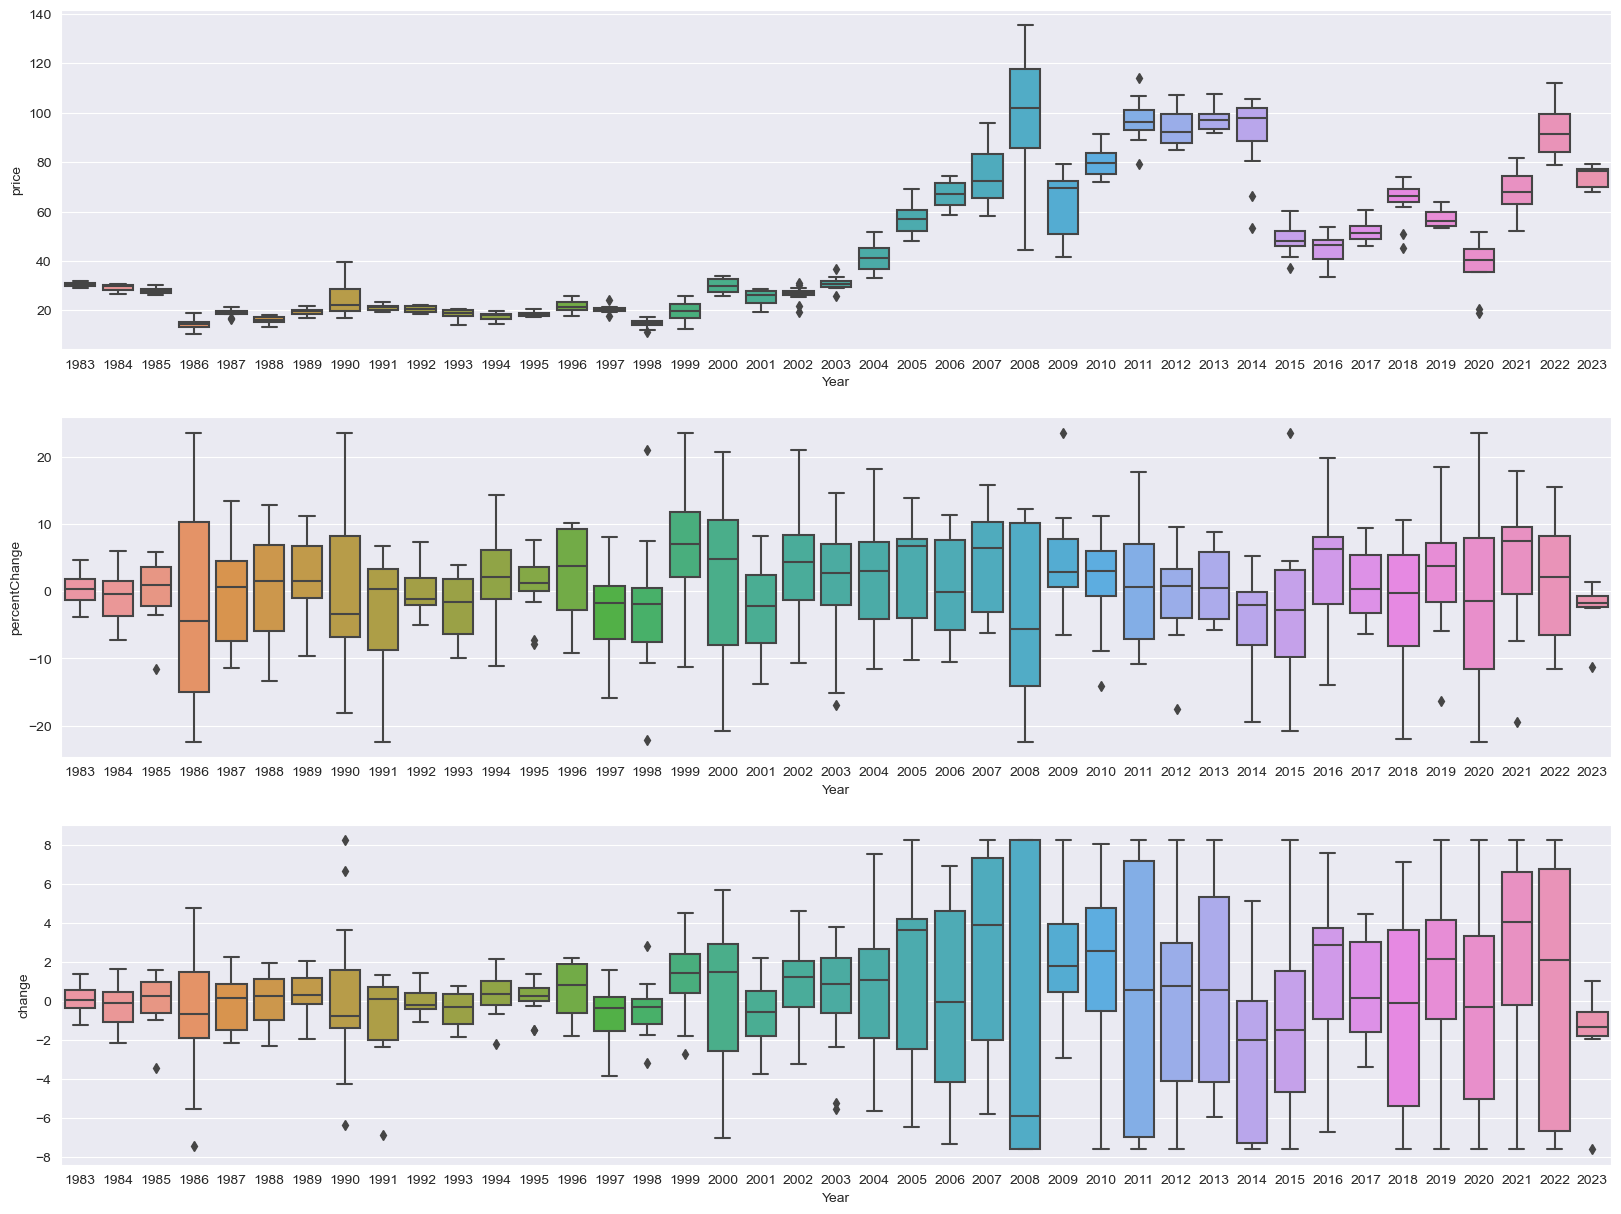

In [27]:
#The IQR(Inter quartile range) is a common and trusted method to detect the outliers and remove from the given data.

#Price
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
q1_p = Ndata['price'].quantile(0.25)
q3_p = Ndata['price'].quantile(0.75)
IQR_p = q3_p - q1_p
lower_limit_p = q1_p - 1.5 * IQR_p
upper_limit_p = q3_p + 1.5 * IQR_p
Ndata['price'] = Ndata['price'].clip(lower=lower_limit_p, upper=upper_limit_p)
sns.boxplot(x="Year",y="price",data=Ndata);
#PercentChange
plt.subplot(3,1,2)
q1 = Ndata['percentChange'].quantile(0.25)
q3 = Ndata['percentChange'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
Ndata['percentChange'] = Ndata['percentChange'].clip(lower=lower_limit, upper=upper_limit)
sns.boxplot(x="Year",y="percentChange",data=Ndata);
#Change
plt.subplot(3,1,3)
q1_c = Ndata['change'].quantile(0.25)
q3_c = Ndata['change'].quantile(0.75)
IQR_c = q3_c - q1_c
lower_limitC = q1_c - 1.5 * IQR_c
upper_limitC = q3_c + 1.5 * IQR_c
Ndata['change'] = Ndata['change'].clip(lower=lower_limitC, upper=upper_limitC)
sns.boxplot(x="Year",y="change",data=Ndata);

# Completion Of Treating The Outliers

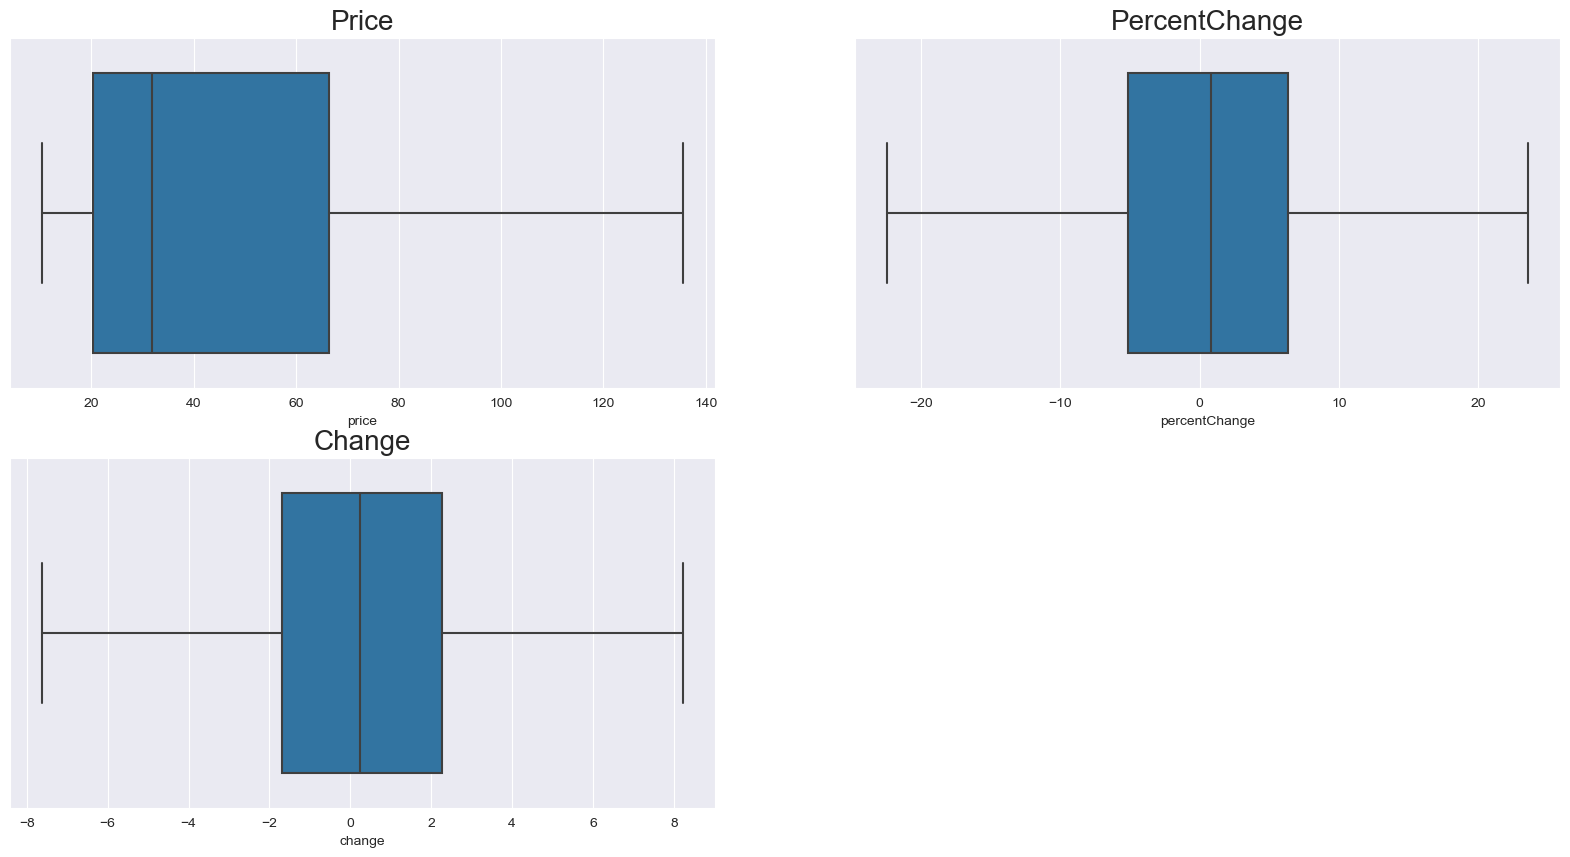

In [28]:
# Create a boxplot for each variable to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
sns.boxplot(x='price', data=Ndata)
plt.title('Price', size=20)
plt.subplot(2,2,2)
sns.boxplot(x='percentChange',data=Ndata)
plt.title('PercentChange', size=20)

plt.subplot(2,2,3)
sns.boxplot(x='change',data=Ndata)
plt.title('Change', size=20)
plt.show()

# Feature Engineering

In [29]:
Ndata['Month'] = pd.to_datetime(Ndata['date']).dt.strftime("%m")

<Axes: xlabel='Month', ylabel='change'>

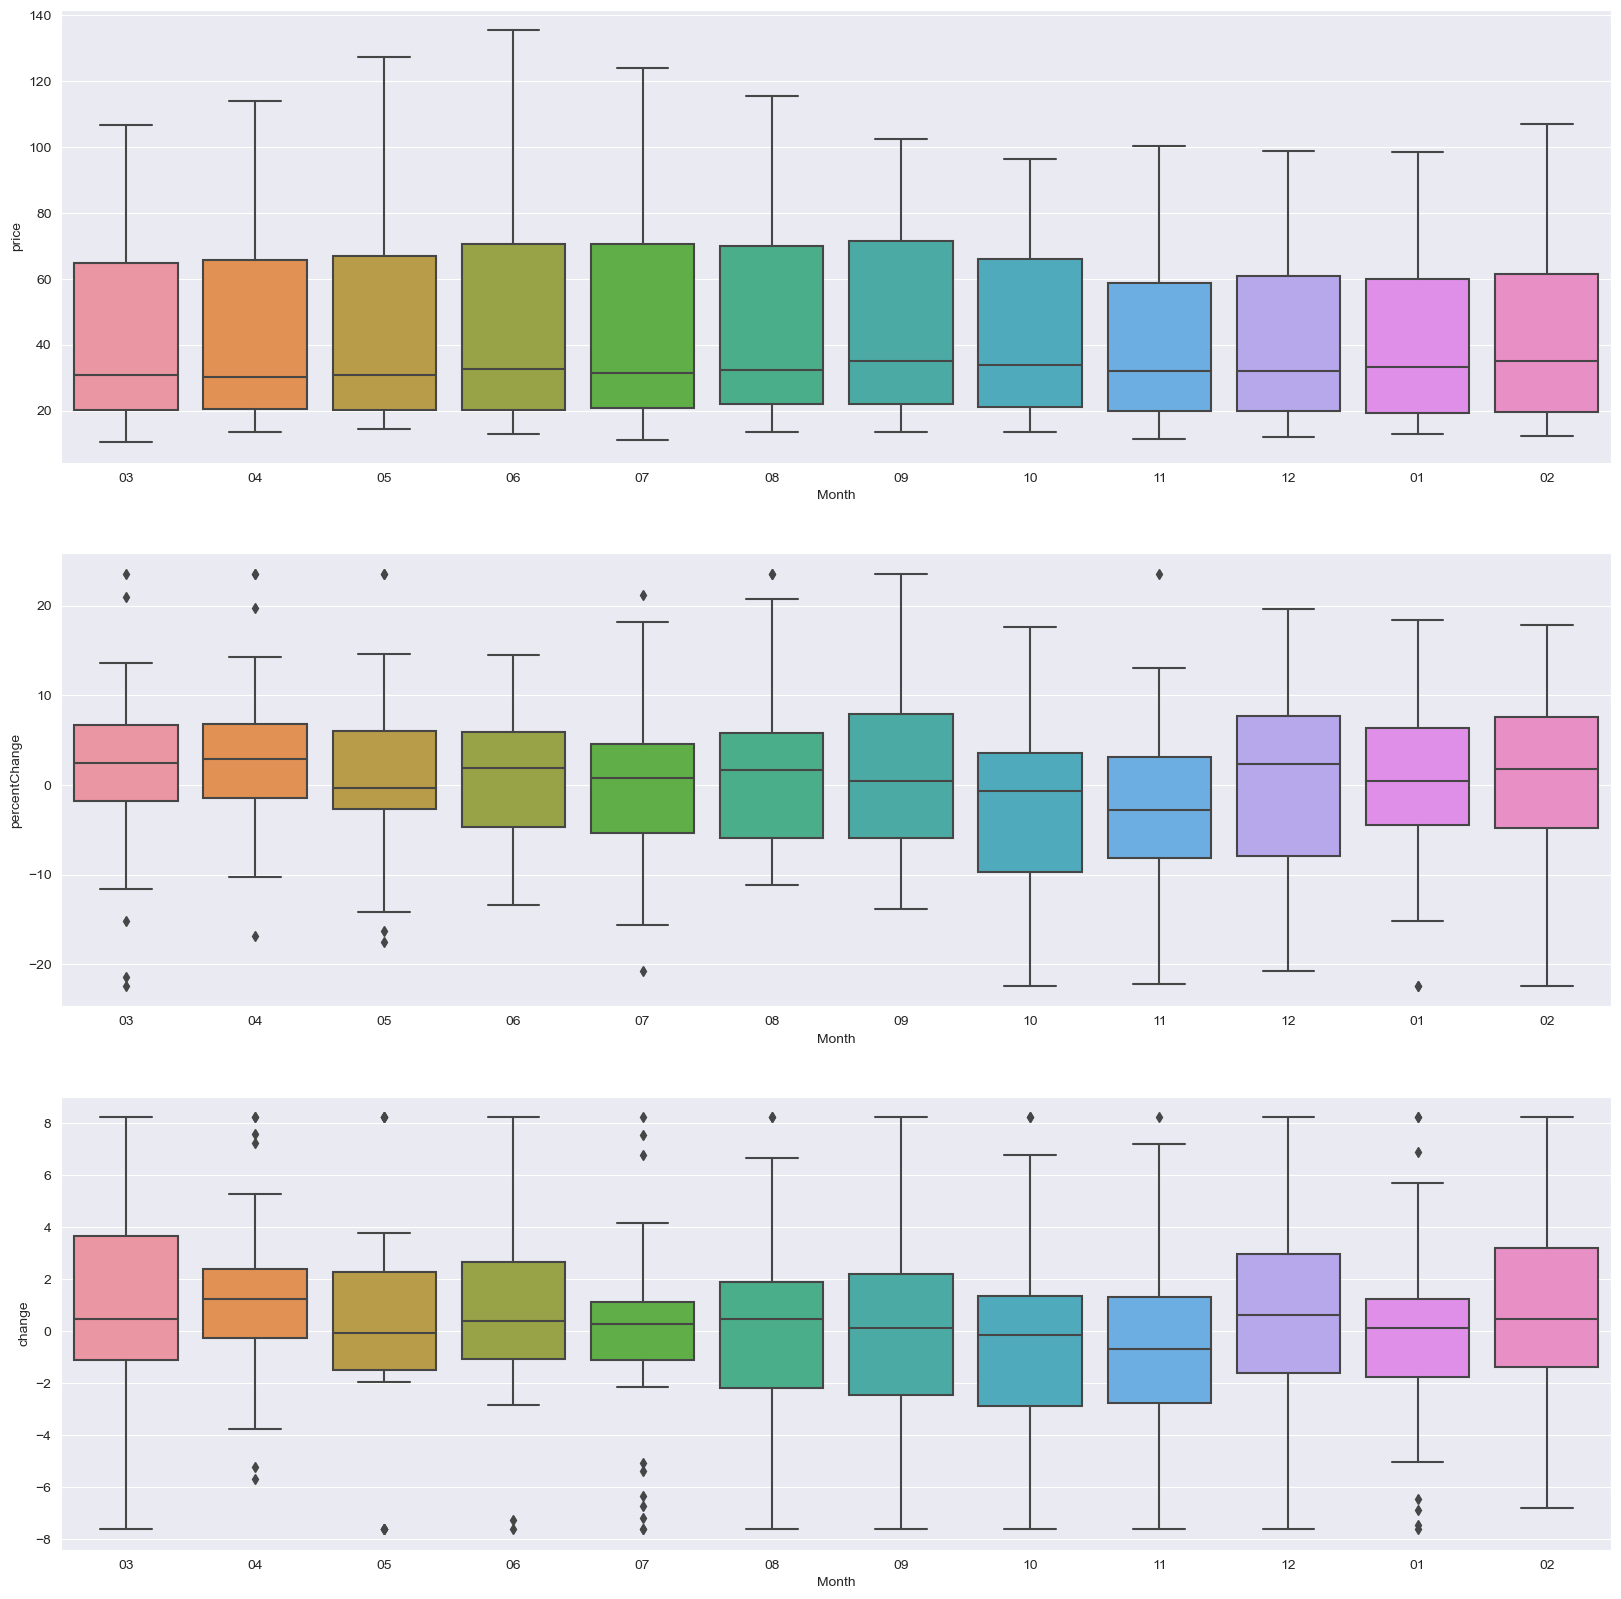

In [30]:
plt.figure(figsize = (20,20))
plt.subplot(311)
sns.boxplot(x='Month', y='price', data=Ndata)
plt.subplot(312)
sns.boxplot(x='Month', y='percentChange', data=Ndata)
plt.subplot(313)
sns.boxplot(x='Month', y='change', data=Ndata)

# Treating Outliers by Monthwise

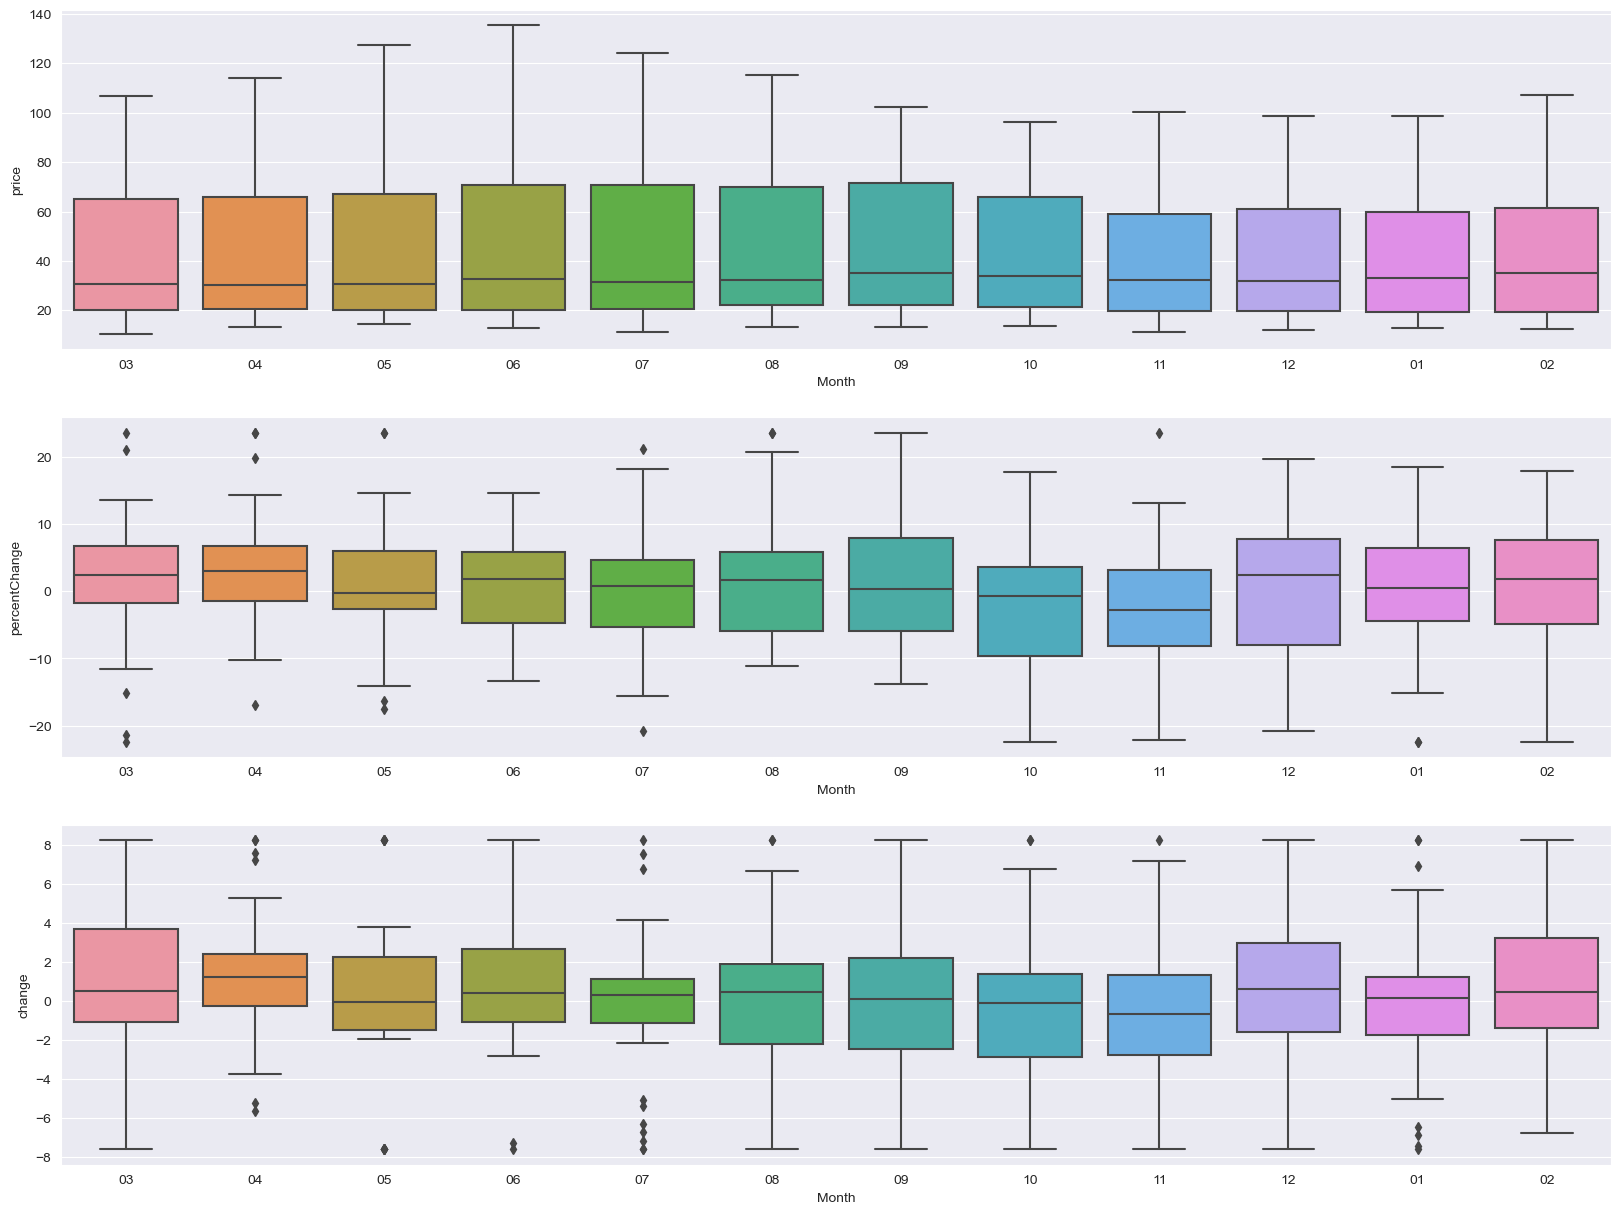

In [31]:
#Price
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
q1_p = Ndata['price'].quantile(0.25)
q3_p = Ndata['price'].quantile(0.75)
IQR_p = q3_p - q1_p
lower_limit_p = q1_p - 1.5 * IQR_p
upper_limit_p = q3_p + 1.5 * IQR_p
Ndata['price'] = Ndata['price'].clip(lower=lower_limit_p, upper=upper_limit_p)
sns.boxplot(x="Month",y="price",data=Ndata);
#PercentChange
plt.subplot(3,1,2)
q1 = Ndata['percentChange'].quantile(0.25)
q3 = Ndata['percentChange'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
Ndata['percentChange'] = Ndata['percentChange'].clip(lower=lower_limit, upper=upper_limit)
sns.boxplot(x="Month",y="percentChange",data=Ndata);
#Change
plt.subplot(3,1,3)
q1_c = Ndata['change'].quantile(0.25)
q3_c = Ndata['change'].quantile(0.75)
IQR_c = q3_c - q1_c
lower_limitC = q1_c - 1.5 * IQR_c
upper_limitC = q3_c + 1.5 * IQR_c
Ndata['change'] = Ndata['change'].clip(lower=lower_limitC, upper=upper_limitC)
sns.boxplot(x="Month",y="change",data=Ndata);

In [32]:
Ndata.set_index('date')

,price,percentChange,change,Year,Month
date,,,,,
1983-03-30,29.2700,0.718352,0.079697,1983,03
1983-04-04,30.6300,4.646000,1.360000,1983,04
1983-05-02,30.2500,-1.241000,-0.380000,1983,05
1983-06-01,31.3800,3.736000,1.130000,1983,06
1983-07-01,32.0000,1.976000,0.620000,1983,07
...,...,...,...,...,...
2023-02-01,77.1900,-2.501000,-1.980000,2023,02
2023-03-01,75.8000,-1.801000,-1.390000,2023,03
2023-04-03,76.7800,1.293000,0.980000,2023,04


<Axes: xlabel='change', ylabel='Density'>

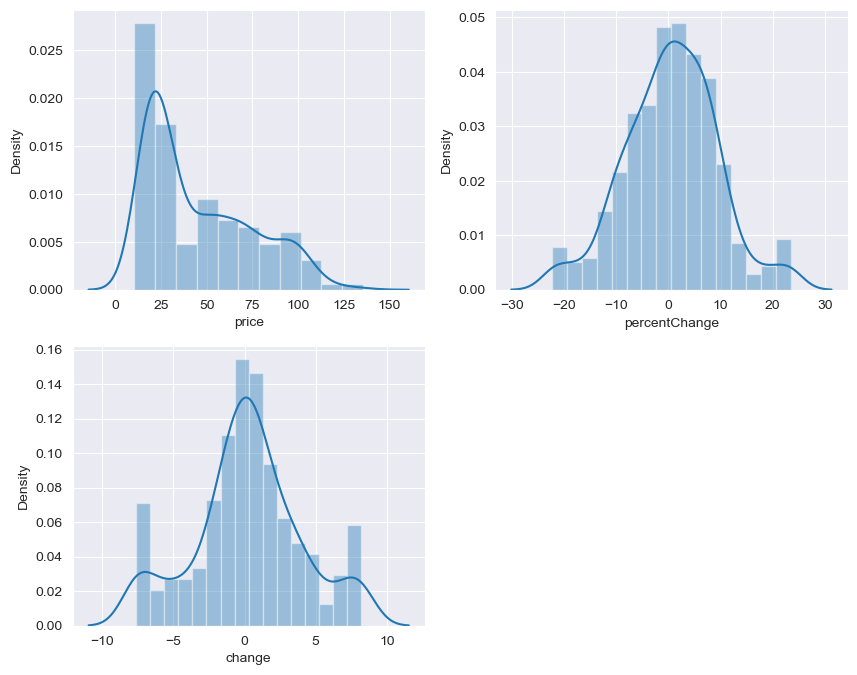

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(Ndata['price'])
plt.subplot(2,2,2)
sns.distplot(Ndata['percentChange'])
plt.subplot(2,2,3)
sns.distplot(Ndata['change'])

# Correlation

In [34]:
Ndata.corr()

,price,percentChange,change,Year
price,1.000000,0.078758,0.125663,0.712705
percentChange,0.078758,1.000000,0.880087,0.029966
change,0.125663,0.880087,1.000000,0.050438
Year,0.712705,0.029966,0.050438,1.000000


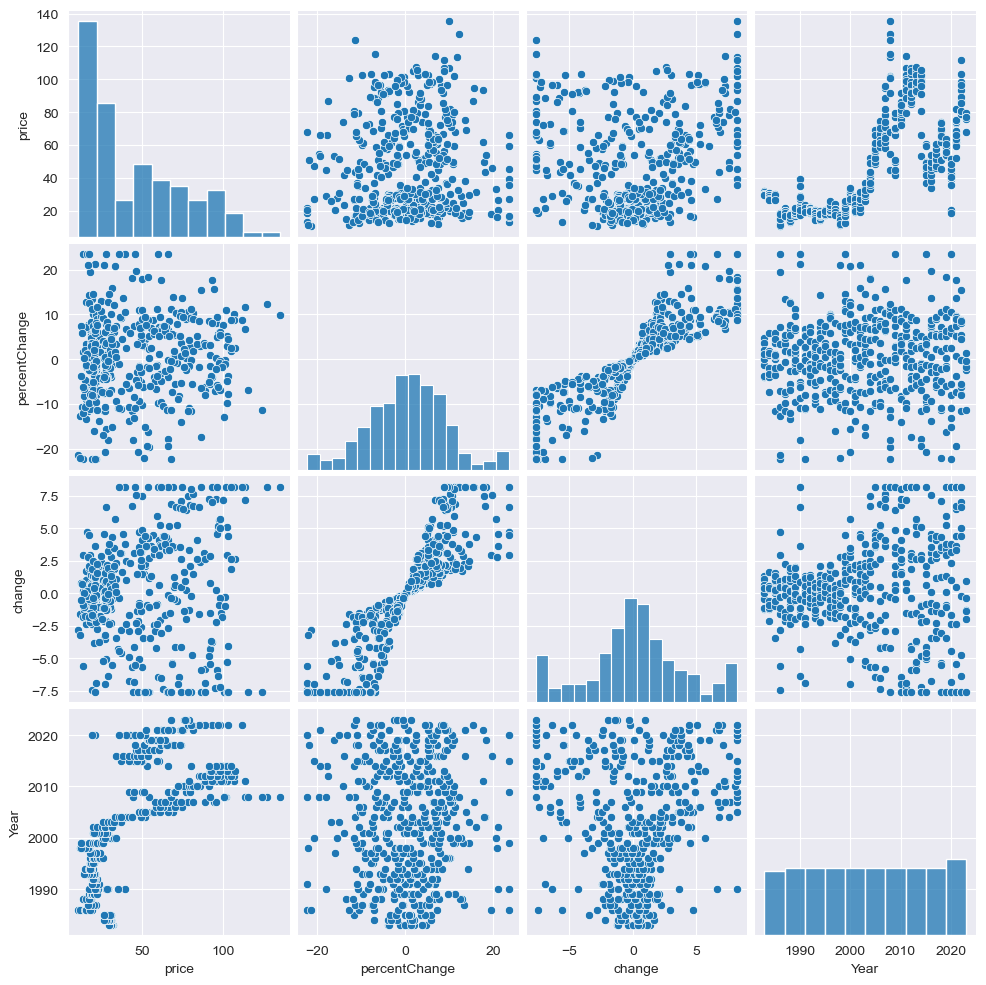

In [35]:
sns.pairplot(Ndata)

In [36]:
#1. Univarite Feature Selection
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
Ndata.head(3)

,date,price,percentChange,change,Year,Month
0,1983-03-30,29.27,0.718352,0.079697,1983,03
1,1983-04-04,30.63,4.646000,1.360000,1983,04
2,1983-05-02,30.25,-1.241000,-0.380000,1983,05


<Axes: xlabel='Month', ylabel='Year'>

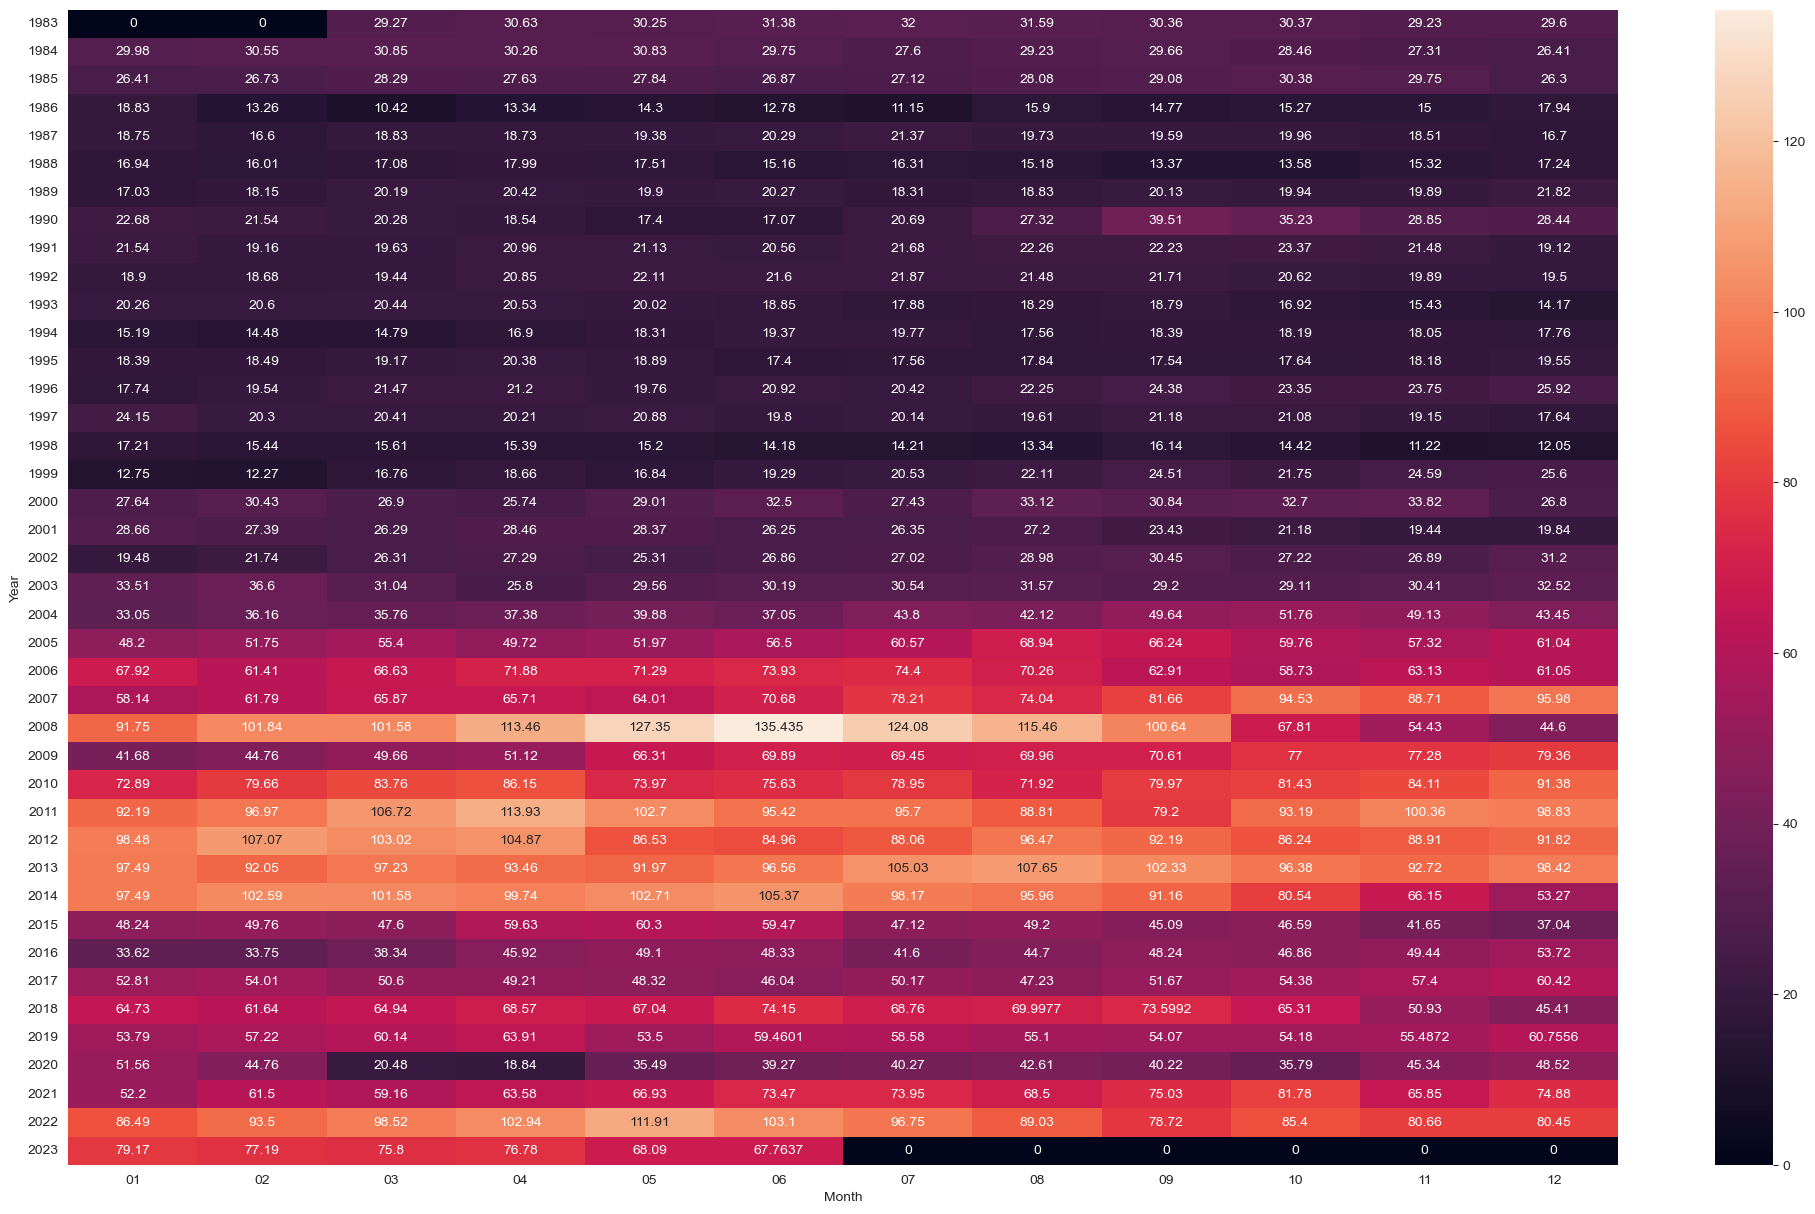

In [38]:
#Heat Map by Piv
plt.figure(figsize=(25,15))
heatmap_month=pd.pivot_table(data=Ndata,values='price',index='Year',columns='Month',fill_value=0)
sns.heatmap(heatmap_month,annot=True,fmt='g')

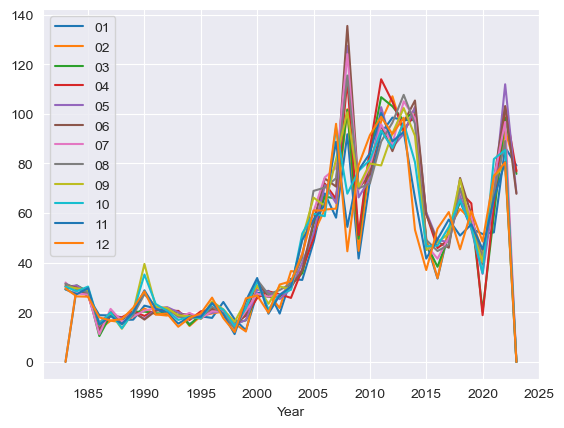

In [39]:
heatmap_month.plot()
plt.legend()

<Axes: xlabel='Year', ylabel='price'>

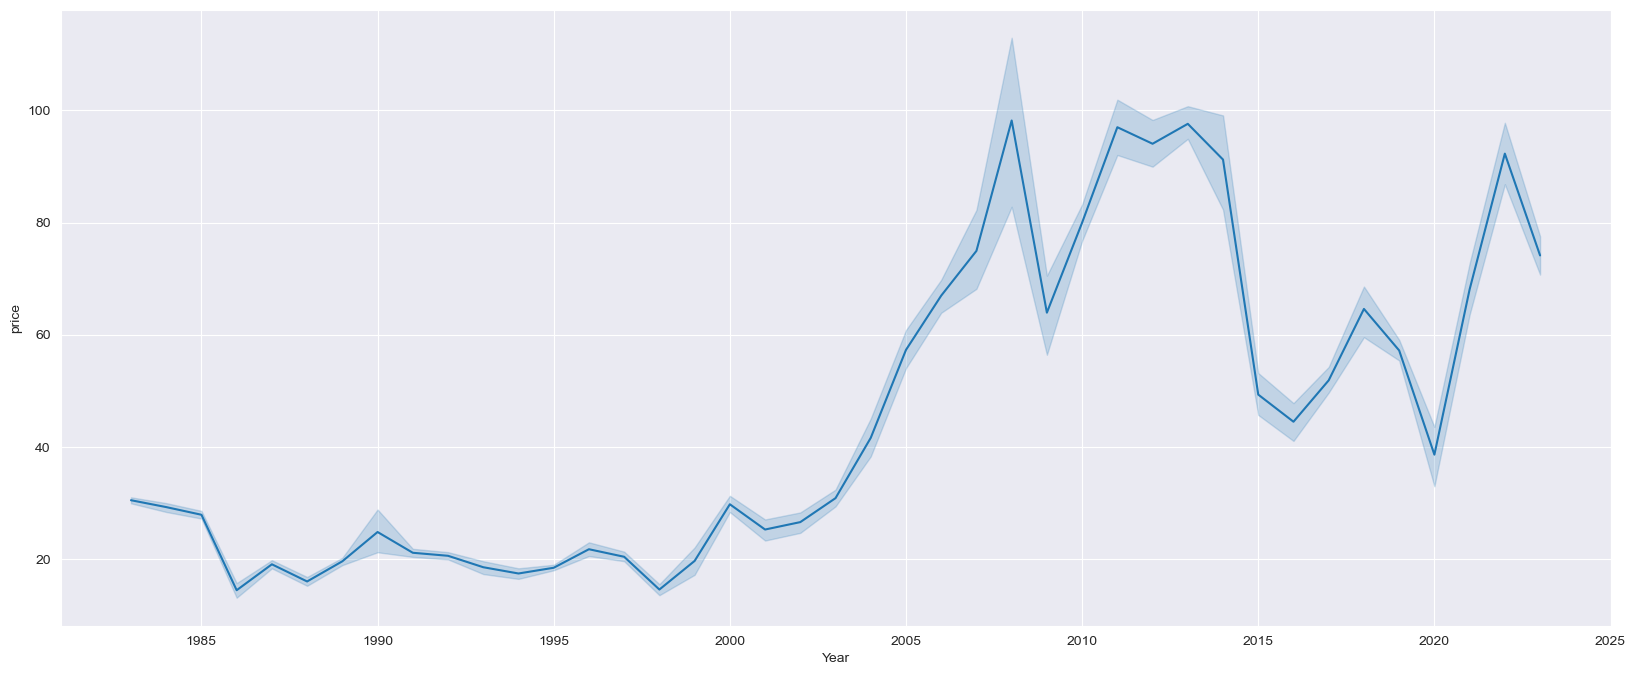

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Year', y='price', data=Ndata)

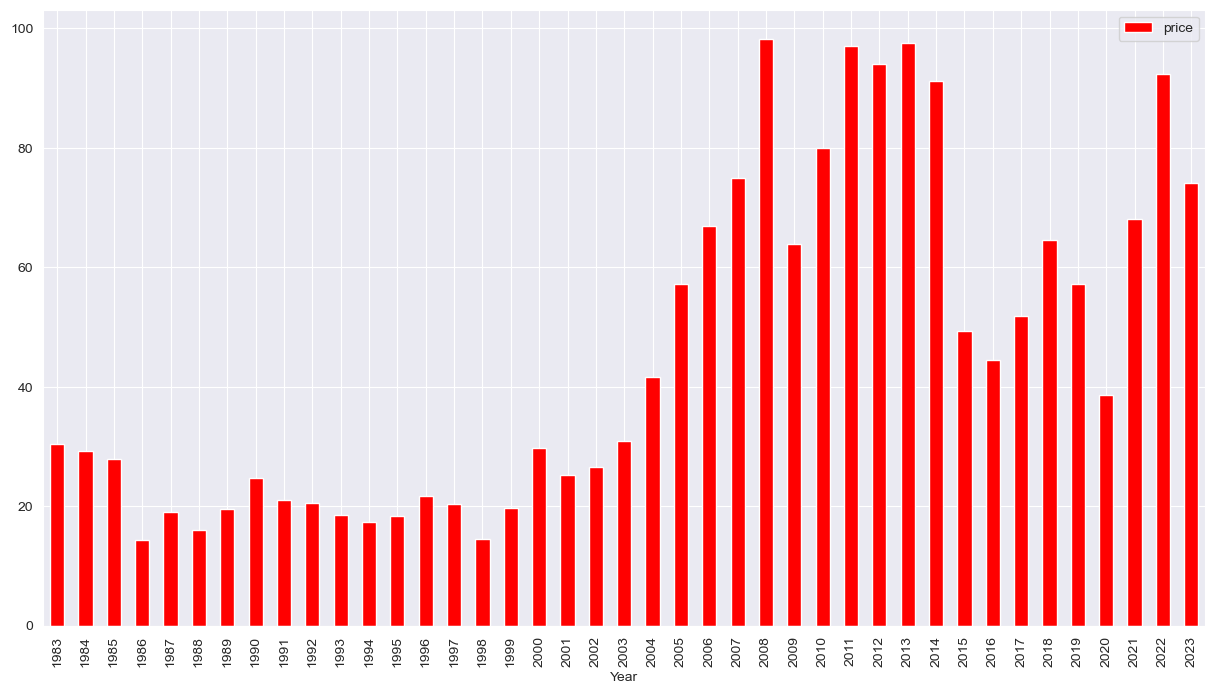

In [41]:
plt.figure(figsize=(15,8))
Ndata.groupby('Year')['price'].mean().plot(kind='bar',color='red')
plt.legend()

# STANDARDIZATION OF DATA

In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)
  print("EVIDENCE:-")      
  if dftest[1] <=0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")      


In [43]:
adf_test(Ndata['price'])

1. ADF :  -2.295442946389435
2. P-Value :  0.17344192462186941
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 482
5. Critical Values :
	 1% :  -3.4439899743408136
	 5% :  -2.8675550551408353
	 10% :  -2.569973792117904
EVIDENCE:-
weak evidence against null hypothesis,indicating it is non-stationary 


The above is non stationary because the P-Value is greater than the 0.05 limit value we can accept the null hypothesis. So we have to do the diffrenciating methods

In [44]:
Ndata['Price_first_difference']=Ndata['price']-Ndata['price'].shift(1)

In [45]:
adf_test(Ndata['Price_first_difference'].dropna())

1. ADF :  -17.643954349379126
2. P-Value :  3.747437288319509e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 482
5. Critical Values :
	 1% :  -3.4439899743408136
	 5% :  -2.8675550551408353
	 10% :  -2.569973792117904
EVIDENCE:-
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Our Data is Standardized so we can build The model of ARMI.

# Time Seires Decompasation

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

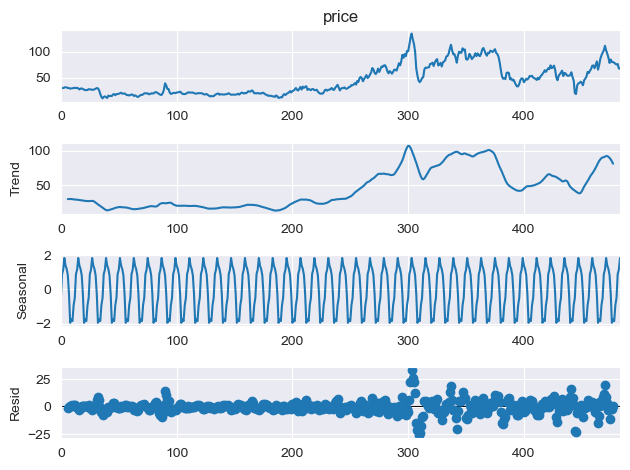

In [47]:
#Time series decomposition plot of Additive Model
decompose_ts_ad = seasonal_decompose((Ndata['price']), period=12, model='additive').plot()
plt.show()

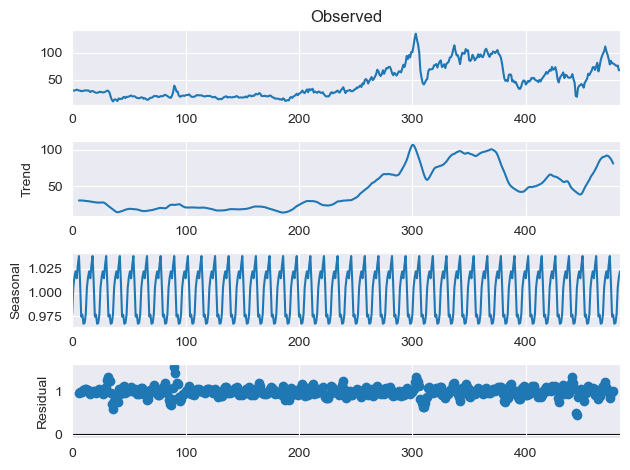

In [48]:
#Decomposation of Multiplicative Model
decompose_ts_mlt=seasonal_decompose((Ndata['price'].values), period=12, model='multiplicative').plot()

# Correlations and Auto Correlation Charts

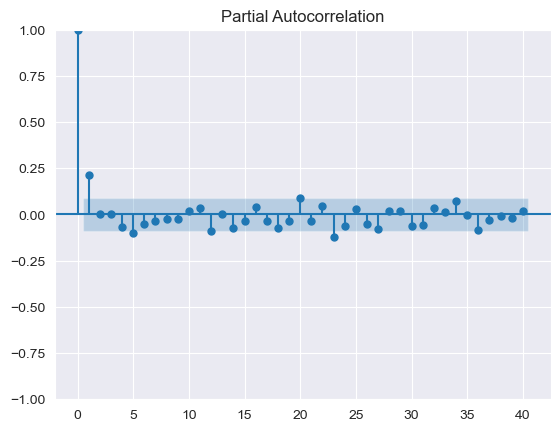

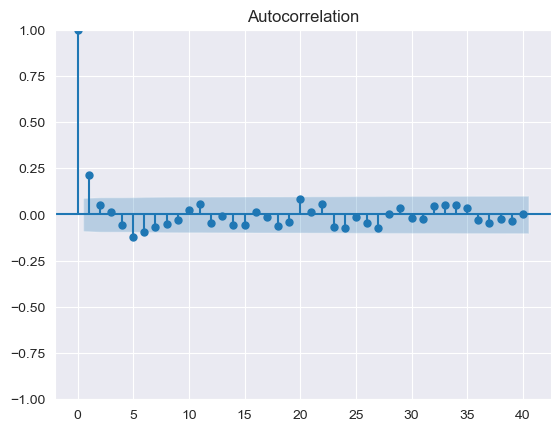

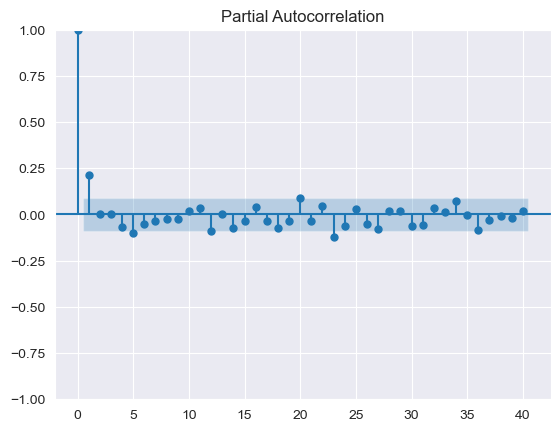

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(Ndata['Price_first_difference'].dropna().iloc[1:], lags=40)
plot_pacf(Ndata['Price_first_difference'].dropna().iloc[1:], lags=40)

# MODEL BUILING

In [50]:
#Forecating Models
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [51]:
#Auto_Arima model for auto creation of model order
#Install Auto_Arima.
stepwise_fit=auto_arima(Ndata['price'], start_p=1, start_max_p=3, max_q=3, m=12, start_P=0, seasonal= True, d=None, D=1, trace=True, error_action='ignore', suppress_warnings= True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4059.048, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3060.171, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3532.358, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4059.386, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3181.568, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3003.314, Time=2.02 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4011.262, Time=0.94 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2975.352, Time=1.49 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3028.397, Time=0.44 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=2

In [52]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  484
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1481.842
Date:                            Thu, 20 Jul 2023   AIC                           2973.683
Time:                                    15:58:08   BIC                           2994.468
Sample:                                         0   HQIC                          2981.859
                                            - 484                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1825      0.037     32.277      0.000       1.111       1.254
ar.L2         -0.2478      0.037     -6.670      0.000      -0.321      -0.175
ar.S.L12      -0.6689      0.031    -21.317      0.000      -0.730      -0.607
ar.S.L24      -0.3427      0.026    -12.963      0.000      -0.395      -0.291
sigma2        30.6724      1.248     24.586      0.000      28.227      33.118
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               268.37
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              11.74   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
#Spilt the data into Training set and Testing Test
train=Ndata.iloc[:-80]
test=Ndata.iloc[-80:]

In [54]:
train

,date,price,percentChange,change,Year,Month,Price_first_difference
0,1983-03-30,29.27,0.718352,0.079697,1983,03,NaN
1,1983-04-04,30.63,4.646000,1.360000,1983,04,1.36
2,1983-05-02,30.25,-1.241000,-0.380000,1983,05,-0.38
3,1983-06-01,31.38,3.736000,1.130000,1983,06,1.13
4,1983-07-01,32.00,1.976000,0.620000,1983,07,0.62
...,...,...,...,...,...,...,...
399,2016-06-01,48.33,-1.568000,-0.770000,2016,06,-0.77
400,2016-07-01,41.60,-13.925000,-6.730000,2016,07,-6.73
401,2016-08-01,44.70,7.452000,3.100000,2016,08,3.10
402,2016-09-01,48.24,7.919000,3.540000,2016,09,3.54


In [55]:
#Model Evalution Metric by MAPE
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and MAPE greater than 25% very low accuracy, so low that the forecast is not acceptable in terms of its accuracy.

# ARIMA 

In [56]:
#Model
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(train['price'], order=(2,0,0)).fit()
from sklearn.metrics import r2_score
import sklearn.metrics as sm

<Axes: >

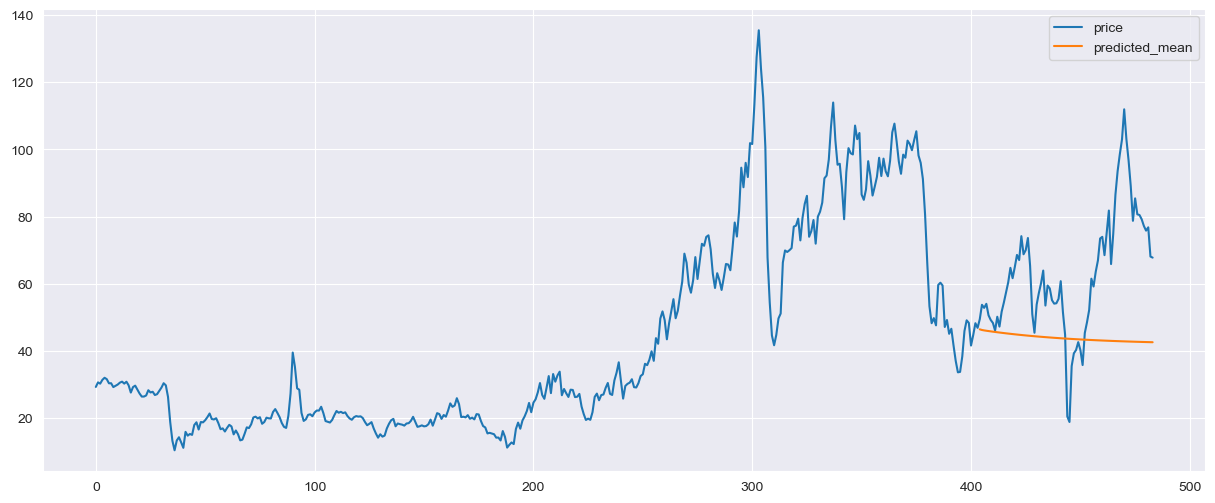

In [57]:
predict1=model1.predict(start=test['price'].index[0], end=test['price'].index[-1], dynamic=False)
Ndata['price'].plot(legend=True, figsize=(15,6))
predict1.plot(legend='Predict')

In [58]:
rmse1=sqrt(mean_squared_error(test.price, predict1))
rmse1_r=sqrt(mean_squared_error(train.price, model1.fittedvalues))
MAPE_=MAPE(test.price,predict1)
print('Test_rmse:-', rmse1)
print('Train_rmse:-', rmse1_r)
print('MAPE_Value:-', MAPE_)
print("R2_Score:-", sm.r2_score(test['price'],predict1))

Test_rmse:- 26.17111697901947
Train_rmse:- 4.380120334142433
MAPE_Value:- 30.67769951687011
R2_Score:- -1.1906167106743957


# SARIMAX

In [59]:
#Model 2
import statsmodels.api as sma
model2=sma.tsa.statespace.SARIMAX(train['price'], order=(2,0,0), seasonal_order=(2,1,0,12), dynamic=False).fit()
print(model2.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03307D+00    |proj g|=  2.01615D-01

At iterate    5    f=  2.95709D+00    |proj g|=  2.55539D-02

At iterate   10    f=  2.95573D+00    |proj g|=  5.68466D-03

At iterate   15    f=  2.95566D+00    |proj g|=  3.02474D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   3.025D-06   2.956D+00
  F =   2.9556577175690264     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

<Axes: >

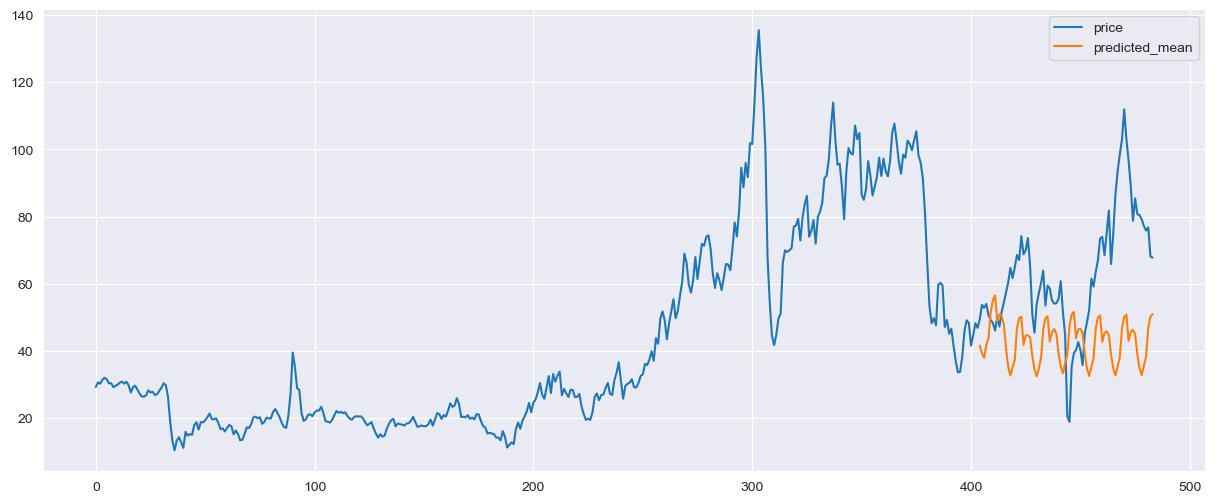

In [60]:
predict2=model2.predict(start=test.index[0], end=test.index[-1], dynamic=False)
Ndata['price'].plot(legend=True)
predict2.plot(legend='Predict',figsize=(15,6))

In [61]:
rmse2=sqrt(mean_squared_error(test.price, predict2))
rmse2_r=sqrt(mean_squared_error(train.price, model2.fittedvalues))
MAPE_2=MAPE(test.price,predict2)
print('Test_rmse:-', rmse2)
print('Train_rmse:-', rmse2_r)
print('MAPE_Value:-', MAPE_2)
print("R2_Score:-", sm.r2_score(test['price'],predict2))

Test_rmse:- 27.51811052652065
Train_rmse:- 7.223304233107443
MAPE_Value:- 35.03859646169131
R2_Score:- -1.4219161337713526


Out of sample forecasts are always dynamic. Dynamic only matters if the
dynamic point is in sample.

# Linear Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
Kdata=Ndata[['date', 'price']]
Kdata.head()

,date,price
0,1983-03-30,29.27
1,1983-04-04,30.63
2,1983-05-02,30.25
3,1983-06-01,31.38
4,1983-07-01,32.00


In [64]:
Kdata.set_index('date')

,price
date,
1983-03-30,29.2700
1983-04-04,30.6300
1983-05-02,30.2500
1983-06-01,31.3800
1983-07-01,32.0000
...,...
2023-02-01,77.1900
2023-03-01,75.8000
2023-04-03,76.7800


In [65]:
Kdata['Month'] = pd.to_datetime(Kdata['date']).dt.strftime("%m")
Kdata['Year'] = pd.to_datetime(Kdata['date']).dt.strftime("%Y")

In [66]:
Kdata['Year']=Kdata['Year'].astype(str).astype(int)
Kdata['Month']=Kdata['Month'].astype(str).astype(int)

In [67]:
Kdata.shape

(484, 4)

<Axes: xlabel='date', ylabel='price'>

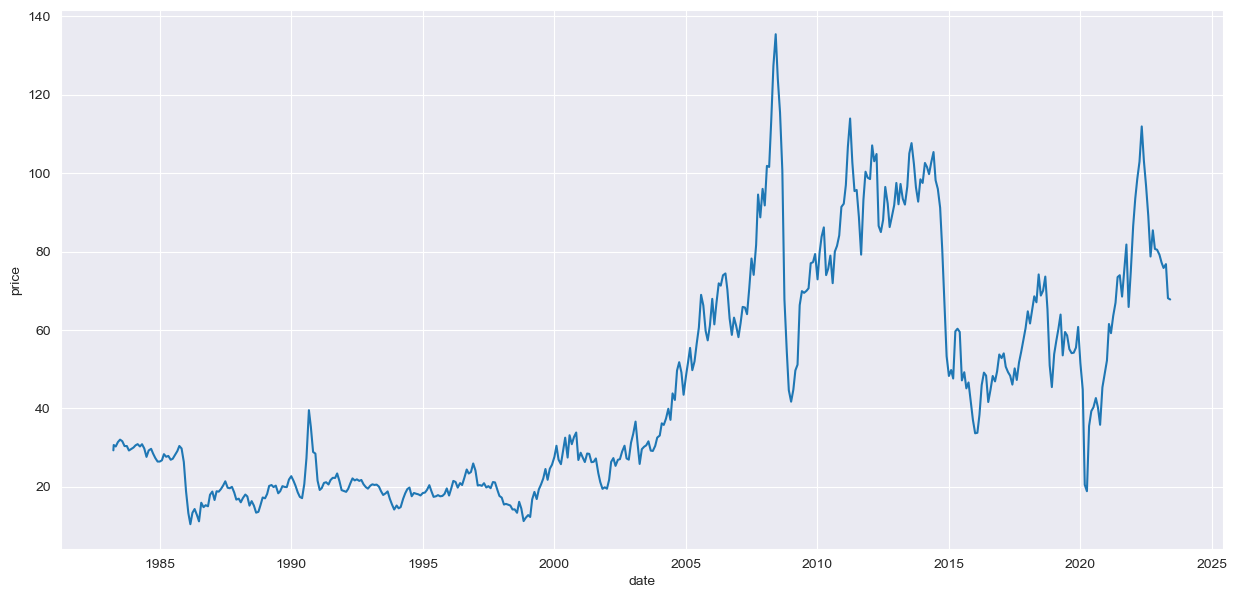

In [68]:
plt.figure(figsize=(15,7))
sns.lineplot(data=Kdata, x='date', y='price')

In [69]:
Kdata['MA40'] = Kdata['price'].shift(1).rolling(window=40).mean()
Kdata['MA3'] = Kdata['price'].shift(1).rolling(window=2).mean()

In [70]:
Kdata=Kdata.dropna()

In [71]:
X=Kdata[['Year','Month','MA40','MA3']].dropna()
X.shape

(444, 4)

In [72]:
training=0.8
t=int(training*len(Kdata))

In [73]:
Y=Kdata['price']

In [74]:
X_train = X[:t]
y_train = Y[:t]

In [75]:
X_test = X[t:]
y_test = Y[t:]

In [76]:
X_train.shape

(355, 4)

In [77]:
y_train.shape

(355,)

In [78]:
model = LinearRegression().fit(X_train,y_train)

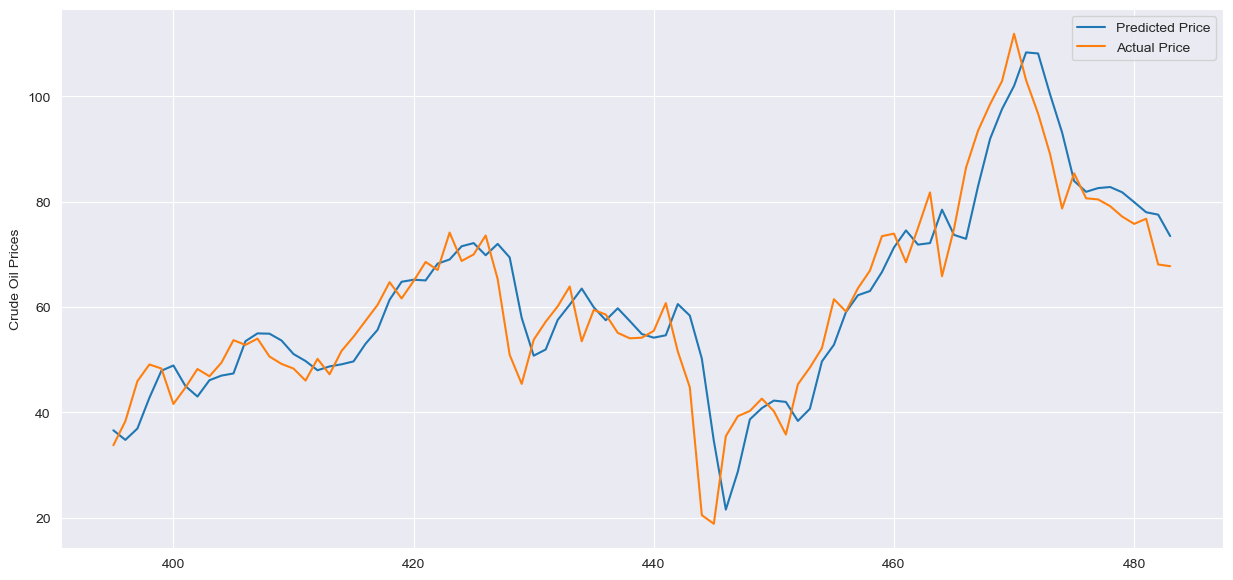

In [79]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(15,7))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices")
plt.show()

In [80]:
import sklearn.metrics as sm
R2_score_L=round(sm.r2_score(y_test, predicted_price), 2)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted_price), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted_price), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted_price), 2))
print("R2 score =", R2_score_L)

Mean absolute error = 5.46
Mean squared error = 53.12
Median absolute error = 4.13
R2 score = 0.83


# Holt Winters

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
#Holts winters with seasonality
model4_1=ExponentialSmoothing(train['price'], seasonal='add', trend='add', seasonal_periods=12).fit()


In [83]:
predict_4_1=model4_1.predict(start=test.index[0], end=test.index[-1])
print('MAPE_Value:-->',MAPE(predict_4_1,test['price']))

MAPE_Value:--> 35.38778828121311


In [84]:
# Multiple and Additive 
model4_2=ExponentialSmoothing(train['price'], seasonal='mul', trend='add', seasonal_periods=12).fit()

<Axes: >

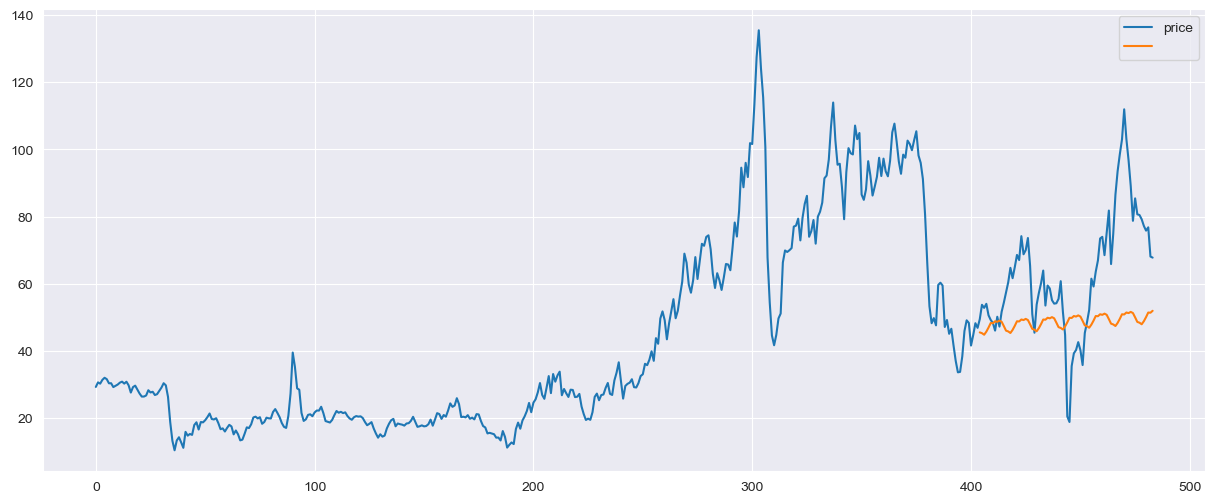

In [85]:
predict4=model4_1.predict(start=test.index[0], end=test.index[-1])
Ndata['price'].plot(legend=True)
predict4.plot(legend='Predict', figsize=(15,6))

In [86]:
rmse4=round(mean_squared_error(test.price, predict4))
rmse4_r=round(mean_squared_error(train.price, model4_2.fittedvalues))
MAPE_4=MAPE(predict4,test.price)
print('Test_rmse:-', rmse4)
print('Train_rmse:-', rmse4_r)
print('MAPE_Value:-', MAPE_4)

Test_rmse:- 491
Train_rmse:- 19
MAPE_Value:- 35.38778828121311


# Holts Double Exponential

<Axes: >

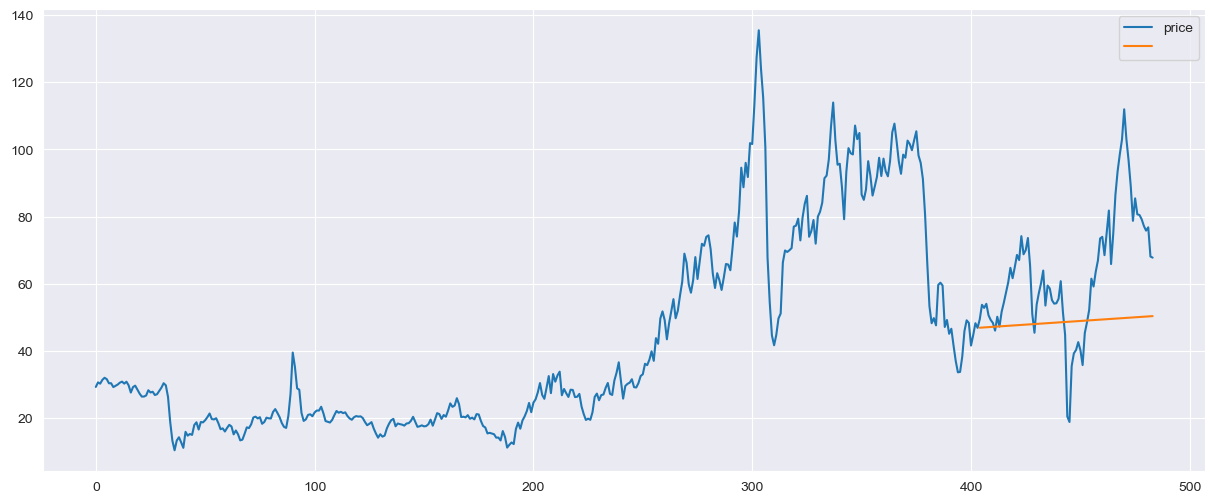

In [87]:
from statsmodels.tsa.holtwinters import Holt
model5=Holt(train['price']).fit(optimized=True)
predict5=model5.forecast(80)
Ndata['price'].plot(legend=True,figsize=(15,6))
predict5.plot(legend="predict")


In [88]:
rmse5=sqrt(mean_squared_error(test.price, predict5))
rmse5_r=sqrt(mean_squared_error(train.price, model5.fittedvalues))
MAPE_5=MAPE(predict5,test.price)
print('Test_rmse:-', rmse5)
print('Train_rmse:-', rmse5_r)
print('MAPE_Value:-', MAPE_5)
print("R2_Score:-", sm.r2_score(Ndata['price'].iloc[:80],predict5))

Test_rmse:- 22.219307592585285
Train_rmse:- 4.507366564094034
MAPE_Value:- 35.30490785995376
R2_Score:- -17.527339382269805


# Simple Exponential Method

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Simple Exponential Method
ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.price) 

43.00083766192327

In [90]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(pred_ses,test.price) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 34.04032131025681
smoothing_level  0.1473684210526316 --> MAPE Error 41.03979375493147
smoothing_level  0.19473684210526315 --> MAPE Error 42.94819968142769
smoothing_level  0.24210526315789474 --> MAPE Error 42.901010255957985
smoothing_level  0.2894736842105263 --> MAPE Error 42.31687031813485
smoothing_level  0.33684210526315794 --> MAPE Error 41.68052303909518
smoothing_level  0.38421052631578945 --> MAPE Error 41.14072748685654
smoothing_level  0.43157894736842106 --> MAPE Error 40.7084408845137
smoothing_level  0.4789473684210527 --> MAPE Error 40.367090094963075
smoothing_level  0.5263157894736842 --> MAPE Error 40.09575818830269
smoothing_level  0.5736842105263158 --> MAPE Error 39.87706069004524
smoothing_level  0.6210526315789474 --> MAPE Error 39.69973607316241
smoothing_level  0.6684210526315789 --> MAPE Error 39.5582550315592
smoothing_level  0.7157894736842105 --> MAPE Error 39.45135182368121
smoothing_level  0.7631578947368421 --> MAPE

# Holt Method

In [91]:
# Holt method 
hw_model = Holt(train["price"]).fit(smoothing_level=0.3, smoothing_slope=0.7)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.price) 

16.553437155790128

In [92]:
import numpy as np
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(train["price"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        
        score=MAPE(pred_hw,test.price)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 607.0026489103562
smoothing_level  0.1  smoothing_slope 0.2 --> MAPE Error 515.2796156503629
smoothing_level  0.1  smoothing_slope 0.30000000000000004 --> MAPE Error 40.617337772499674
smoothing_level  0.1  smoothing_slope 0.4 --> MAPE Error 57.57784264740301
smoothing_level  0.1  smoothing_slope 0.5 --> MAPE Error 58.74829587437163
smoothing_level  0.1  smoothing_slope 0.6000000000000001 --> MAPE Error 53.2837809798206
smoothing_level  0.1  smoothing_slope 0.7000000000000001 --> MAPE Error 34.29357252223842
smoothing_level  0.1  smoothing_slope 0.8 --> MAPE Error 18.411135742275135
smoothing_level  0.1  smoothing_slope 0.9 --> MAPE Error 16.659087806803768
smoothing_level  0.2  smoothing_slope 0.1 --> MAPE Error 3259.7534976662837
smoothing_level  0.2  smoothing_slope 0.2 --> MAPE Error 26.68206135740551
smoothing_level  0.2  smoothing_slope 0.30000000000000004 --> MAPE Error 39.24938256654824
smoothing_level  0.2  smoothing_slo

In [93]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
24,0.3,0.7,16.553437
8,0.1,0.9,16.659088
77,0.9,0.6,16.678233
64,0.8,0.2,16.704168
73,0.9,0.2,16.861946
...,...,...,...
34,0.4,0.8,881.949469
35,0.4,0.9,1199.877902
9,0.2,0.1,3259.753498
33,0.4,0.7,5135.885153


<Axes: >

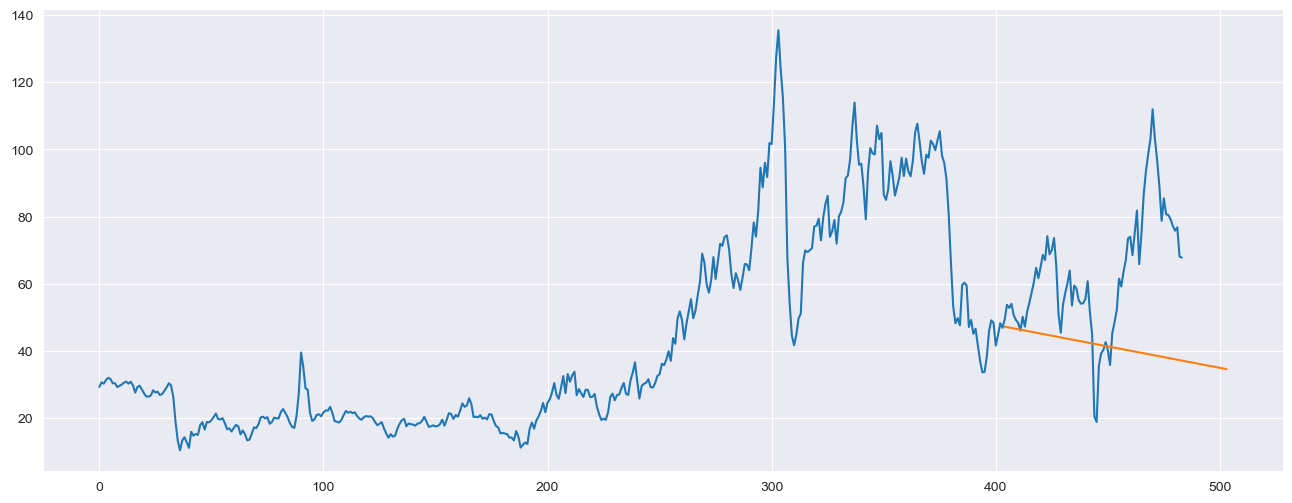

In [94]:
forecasti=hw_model.forecast(100)
forecasti
Ndata['price'].plot(figsize=(16,6))
forecasti.plot()

# Prophet Model

In [97]:
from prophet import Prophet

In [98]:
model_K=Prophet()

In [99]:
Adata=Ndata.rename(columns={'date':'ds','price':'y'})

In [100]:
Adata=Adata[['ds','y','percentChange','change']]

In [101]:
model_K.fit(Adata[['ds','y']])

15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
#we assign 24 months of data to predict the future from 2023-06-01 to 2025-05-01
future = model_K.make_future_dataframe(periods=24,freq = 'M')
forecast = model_K.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
496,2024-06-30,52.323209,35.078157,70.629695
497,2024-07-31,64.901643,45.786716,81.436772
498,2024-08-31,48.816700,30.257091,68.062354
499,2024-09-30,56.510886,36.954727,75.629957
500,2024-10-31,64.079348,45.945270,82.637153
501,2024-11-30,46.884524,29.328910,65.561517
502,2024-12-31,53.945735,35.253979,71.741782
503,2025-01-31,60.539774,42.894539,78.564680
504,2025-02-28,59.054656,41.515777,77.765008
505,2025-03-31,58.113075,38.576620,76.616491


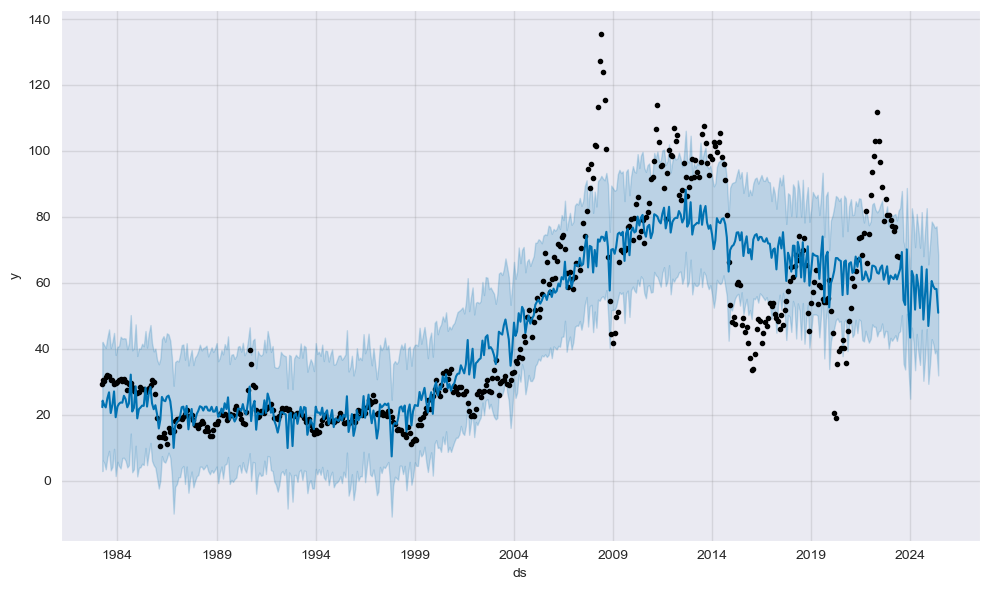

In [103]:
fig1 = model_K.plot(forecast)

<Axes: >

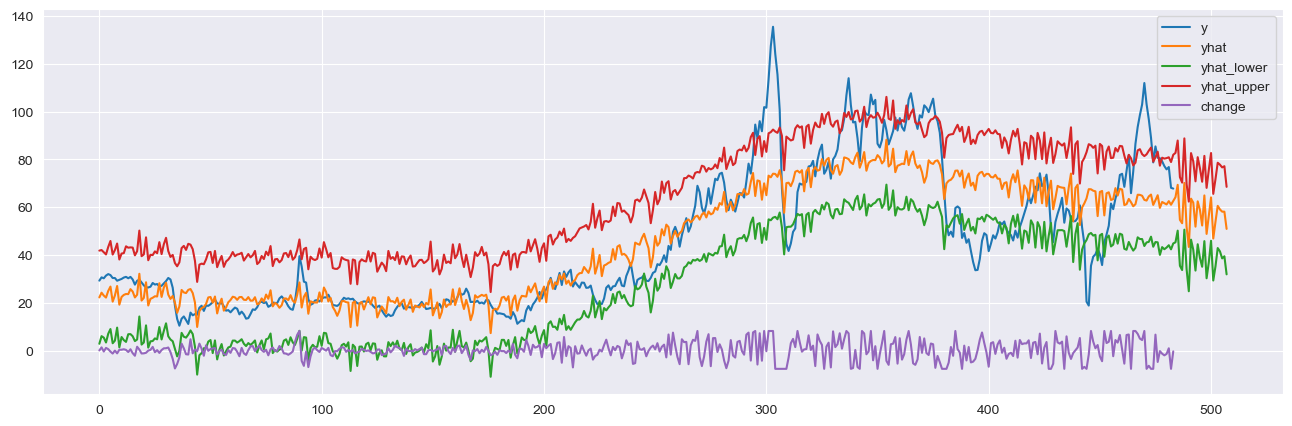

In [104]:
Adata['y'].plot(figsize=(16,5), legend='Price')
forecast['yhat'].plot(legend=True)
forecast['yhat_lower'].plot(legend=True)
forecast['yhat_upper'].plot(legend=True)
Adata['change'].plot(legend=True)

In [105]:
Price = Adata['y'].values
Pred_Price = forecast['yhat'][:-24].values
MAPE_P=MAPE(Price,Pred_Price)
rmse = mean_squared_error(Price, Pred_Price)
R2_score = r2_score(Price, Pred_Price)
print('R-squared Score: %.2f' % R2_score)
print('RMSE: %.2f' % rmse)
print('MAPE Score:-->', MAPE_P)

R-squared Score: 0.75
RMSE: 204.48
MAPE Score:--> 24.53205735917942


# Results

In [106]:
#Model Results
Results=pd.DataFrame({"Models":['ARIMA','SARIMAX','HOLTS WINTER', 'DOUBLE HOLTS', 'LINEAR MODEL','PROPHET'], 'RMSE_TEST':[rmse1,rmse2,rmse4,rmse5,0,rmse],"RMASE_TRAIN":[rmse1_r,rmse2_r,rmse4_r,rmse5_r,0,0], "MAPE":[MAPE_,MAPE_2,MAPE_4,MAPE_5,0,MAPE_P], "R2_score":[0,0,0,0,R2_score_L,R2_score]})

In [107]:
Results

,Models,RMSE_TEST,RMASE_TRAIN,MAPE,R2_score
0,ARIMA,26.171117,4.380120,30.677700,0.000000
1,SARIMAX,27.518111,7.223304,35.038596,0.000000
2,HOLTS WINTER,491.000000,19.000000,35.387788,0.000000
3,DOUBLE HOLTS,22.219308,4.507367,35.304908,0.000000
4,LINEAR MODEL,0.000000,0.000000,0.000000,0.830000
5,PROPHET,204.481403,0.000000,24.532057,0.753323


# Finalization of Model

In [108]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import pickle

In [109]:
#Split the data into test and train
#80% to Trian and 20% to test
train_k=Adata.iloc[:472]
test_k=Adata.iloc[472:]

In [110]:
model_fb = Prophet()
model_fb.fit(train_k)

16:01:07 - cmdstanpy - INFO - Chain [1] start processing
16:01:07 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
pickle.dump(model_fb,open('model_fb.pkl','wb'))